# In Hospital Mortality Prediction

**Dataset:** In Hospital Mortality Prediction Dataset from MIMIC-III database

**Source:** https://www.kaggle.com/datasets/saurabhshahane/in-hospital-mortality-prediction

**Motivation/Goal:**

The goal of the project is to create a classification model to classify whether a patient will experience in-hospital mortality or not, based on the data obtained from patients admitted to the Intensive Care Unit for Heart Failure. The models focused on are Logistic Regression, Random Forest, and K-Nearest Neighbors. EDA, Feature Selection, and Dimensionality Reduction will be used to manipulate the dataset before modeling. 

Additionally, categorical variables will be used to stratify the data into groups so that we can perform hypothesis testing and test classification model performance over these different groups. The categorical variables to be analyzed will be determined using Random Forest. 

**Dataset Variables:**

group, ID, outcome, age, gendera, BMI, hypertensive, atrialfibrillation, CHD with no MI, diabetes, deficiencyanemias, depression, Hyperlipemia, Renal failure, COPD, heart rate, Systolic blood pressure, Diastolic blood pressure, Respiratory rate, temperature, SP O2, Urine output, hematocrit, RBC, MCH, MCHC, MCV, RDW, Leucocyte, Platelets, Neutrophils, Basophils, Lymphocyte, PT, INR, NT-proBNP, Creatine kinase, Creatinine, Urea nitrogen, glucose, Blood potassium, Blood sodium, Blood calcium, Chloride, Anion gap, Magnesium ion, PH, Bicarbonate, Lactic acid, PCO2, EF



### Libraries

In [129]:
#libraries 
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import numpy as np
import eli5
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.preprocessing import  StandardScaler
from sklearn.linear_model import Ridge, LogisticRegression
from sklearn.feature_selection import  SelectKBest,f_classif
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import linear_model
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, r2_score
from sklearn.pipeline import make_pipeline
from sklearn.neighbors import KNeighborsClassifier
import shap
from statsmodels.stats.outliers_influence import variance_inflation_factor

### Color Palette

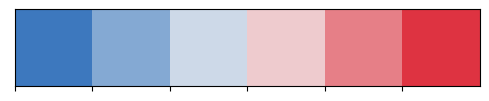

In [130]:
sns.palplot(sns.diverging_palette(250,10, 80, 50, center='light'))

## Data Loading, Preprocessing

In [131]:
df = pd.read_csv("data01.csv")
df.head()

group      ID  outcome  age  gendera        BMI  hypertensive  \
0      1  125047      0.0   72        1  37.588179             0   
1      1  139812      0.0   75        2        NaN             0   
2      1  109787      0.0   83        2  26.572634             0   
3      1  130587      0.0   43        2  83.264629             0   
4      1  138290      0.0   75        2  31.824842             1   

   atrialfibrillation  CHD with no MI  diabetes  ...  Blood sodium  \
0                   0               0         1  ...    138.750000   
1                   0               0         0  ...    138.888889   
2                   0               0         0  ...    140.714286   
3                   0               0         0  ...    138.500000   
4                   0               0         0  ...    136.666667   

   Blood calcium    Chloride  Anion gap  Magnesium ion     PH  Bicarbonate  \
0       7.463636  109.166667  13.166667       2.618182  7.230    21.166667   
1       8.162500   98.444444  11.444444       1.887500  7.225    33.444444   
2       8.266667  105.857143  10.000000       2.157143  7.268    30.571429   
3       9.476923   92.071429  12.357143       1.942857  7.370    38.571429   
4       8.733333  104.500000  15.166667       1.650000  7.250    22.000000   

   Lactic acid  PCO2  EF  
0          0.5  40.0  55  
1          0.5  78.0  55  
2          0.5  71.5  35  
3          0.6  75.0  55  
4          0.6  50.0  55  

[5 rows x 51 columns]

In [132]:
df.shape

(1177, 51)

In [133]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1177 entries, 0 to 1176
Data columns (total 51 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   group                     1177 non-null   int64  
 1   ID                        1177 non-null   int64  
 2   outcome                   1176 non-null   float64
 3   age                       1177 non-null   int64  
 4   gendera                   1177 non-null   int64  
 5   BMI                       962 non-null    float64
 6   hypertensive              1177 non-null   int64  
 7   atrialfibrillation        1177 non-null   int64  
 8   CHD with no MI            1177 non-null   int64  
 9   diabetes                  1177 non-null   int64  
 10  deficiencyanemias         1177 non-null   int64  
 11  depression                1177 non-null   int64  
 12  Hyperlipemia              1177 non-null   int64  
 13  Renal failure             1177 non-null   int64  
 14  COPD    

In [134]:
#convert columns to category
columns_to_category= ['outcome', 'gendera','hypertensive','atrialfibrillation','CHD with no MI','diabetes','deficiencyanemias','depression','Hyperlipemia','Renal failure','COPD']
df[columns_to_category]= df[columns_to_category].astype('category')

In [135]:
#### Renaming columns name
columns = df.columns
new_cols =[]
c1= {}
for col in columns:
    res=col.replace(" ","_")
    c1[col] =res
df.rename(columns=c1, inplace=True)    

In [136]:
df.columns

Index(['group', 'ID', 'outcome', 'age', 'gendera', 'BMI', 'hypertensive',
       'atrialfibrillation', 'CHD_with_no_MI', 'diabetes', 'deficiencyanemias',
       'depression', 'Hyperlipemia', 'Renal_failure', 'COPD', 'heart_rate',
       'Systolic_blood_pressure', 'Diastolic_blood_pressure',
       'Respiratory_rate', 'temperature', 'SP_O2', 'Urine_output',
       'hematocrit', 'RBC', 'MCH', 'MCHC', 'MCV', 'RDW', 'Leucocyte',
       'Platelets', 'Neutrophils', 'Basophils', 'Lymphocyte', 'PT', 'INR',
       'NT-proBNP', 'Creatine_kinase', 'Creatinine', 'Urea_nitrogen',
       'glucose', 'Blood_potassium', 'Blood_sodium', 'Blood_calcium',
       'Chloride', 'Anion_gap', 'Magnesium_ion', 'PH', 'Bicarbonate',
       'Lactic_acid', 'PCO2', 'EF'],
      dtype='object')

In [137]:
df.isnull().sum()

group                         0
ID                            0
outcome                       1
age                           0
gendera                       0
BMI                         215
hypertensive                  0
atrialfibrillation            0
CHD_with_no_MI                0
diabetes                      0
deficiencyanemias             0
depression                    0
Hyperlipemia                  0
Renal_failure                 0
COPD                          0
heart_rate                   13
Systolic_blood_pressure      16
Diastolic_blood_pressure     16
Respiratory_rate             13
temperature                  19
SP_O2                        13
Urine_output                 36
hematocrit                    0
RBC                           0
MCH                           0
MCHC                          0
MCV                           0
RDW                           0
Leucocyte                     0
Platelets                     0
Neutrophils                 144
Basophil

### Data Cleaning

In [138]:
# We don't need the group and ID in our model
df.drop(['group','ID'],axis=1,inplace=True)

In [139]:
# droping duplicate value
df.drop_duplicates()

outcome  age gendera        BMI hypertensive atrialfibrillation  \
0        0.0   72       1  37.588179            0                  0   
1        0.0   75       2        NaN            0                  0   
2        0.0   83       2  26.572634            0                  0   
3        0.0   43       2  83.264629            0                  0   
4        0.0   75       2  31.824842            1                  0   
...      ...  ...     ...        ...          ...                ...   
1172     0.0   62       1  25.516870            1                  1   
1173     0.0   78       1  25.822710            0                  1   
1174     0.0   85       2  23.891779            1                  1   
1175     0.0   79       2  35.288554            0                  0   
1176     0.0   47       1  23.121384            1                  0   

     CHD_with_no_MI diabetes deficiencyanemias depression  ... Blood_sodium  \
0                 0        1                 1          0  ...   138.750000   
1                 0        0                 1          0  ...   138.888889   
2                 0        0                 1          0  ...   140.714286   
3                 0        0                 0          0  ...   138.500000   
4                 0        0                 1          0  ...   136.666667   
...             ...      ...               ...        ...  ...          ...   
1172              0        1                 0          1  ...   136.714286   
1173              0        1                 0          1  ...   135.680000   
1174              0        1                 1          0  ...   136.000000   
1175              1        1                 1          1  ...   140.000000   
1176              0        1                 0          0  ...   135.285714   

     Blood_calcium    Chloride  Anion_gap  Magnesium_ion     PH  Bicarbonate  \
0         7.463636  109.166667  13.166667       2.618182  7.230    21.166667   
1         8.162500   98.444444  11.444444       1.887500  7.225    33.444444   
2         8.266667  105.857143  10.000000       2.157143  7.268    30.571429   
3         9.476923   92.071429  12.357143       1.942857  7.370    38.571429   
4         8.733333  104.500000  15.166667       1.650000  7.250    22.000000   
...            ...         ...        ...            ...    ...          ...   
1172     10.271429   94.428571  20.142857       2.714286    NaN    27.714286   
1173     10.523529  101.720000  18.160000       2.012500    NaN    20.480000   
1174      8.466667   97.285714  14.000000       2.028571    NaN    28.857143   
1175      8.183333  104.000000  15.750000       2.090000    NaN    24.375000   
1176      9.085714   93.857143  20.285714       2.566667    NaN    26.571429   

      Lactic_acid  PCO2  EF  
0             0.5  40.0  55  
1             0.5  78.0  55  
2             0.5  71.5  35  
3             0.6  75.0  55  
4             0.6  50.0  55  
...           ...   ...  ..  
1172          NaN   NaN  40  
1173          NaN   NaN  30  
1174          NaN   NaN  55  
1175          NaN   NaN  25  
1176          NaN   NaN  55  

[1177 rows x 49 columns]

In [140]:
# droping columns with 1 unique value
for col in df.columns:
    if len(df[col].unique()) == 1:
        df.drop(col,inplace=True,axis=1)

We have 1 null value in our categorical data. we have to remove it.

In [141]:
# cheking for unique value in outcome
df['outcome'].unique()

Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.


[0.0, 1.0, NaN]
Categories (2, float64): [0.0, 1.0]

In [142]:
# droping the null value from outcome variable
df = df.dropna(subset=['outcome'])

In [143]:
df.describe()

age         BMI   heart_rate  Systolic_blood_pressure  \
count  1176.000000  962.000000  1164.000000              1161.000000   
mean     74.047619   30.188278    84.575848               117.995035   
std      13.437241    9.325997    16.018701                17.367618   
min      19.000000   13.346801    36.000000                75.000000   
25%      65.000000   24.326461    72.371250               105.391304   
50%      77.000000   28.312474    83.610799               116.128205   
75%      85.000000   33.633509    95.907143               128.625000   
max      99.000000  104.970366   135.708333               203.000000   

       Diastolic_blood_pressure  Respiratory_rate  temperature        SP_O2  \
count               1161.000000       1164.000000  1158.000000  1164.000000   
mean                  59.534497         20.801511    36.677286    96.272900   
std                   10.684681          4.002987     0.607558     2.298002   
min                   24.736842         11.137931    33.250000    75.916667   
25%                   52.173913         17.925694    36.286045    95.000000   
50%                   58.461538         20.372308    36.650794    96.452273   
75%                   65.464286         23.391200    37.021991    97.917500   
max                  107.000000         40.900000    39.132478   100.000000   

       Urine_output   hematocrit  ...  Blood_sodium  Blood_calcium  \
count   1141.000000  1176.000000  ...   1176.000000    1175.000000   
mean    1899.276512    31.910614  ...    138.897009       8.501789   
std     1272.363631     5.203007  ...      4.146172       0.571683   
min        0.000000    20.311111  ...    114.666667       6.700000   
25%      980.000000    28.154375  ...    136.666667       8.150000   
50%     1675.000000    30.795455  ...    139.250000       8.500000   
75%     2500.000000    35.003125  ...    141.600000       8.869375   
max     8820.000000    55.425000  ...    154.736842      10.950000   

          Chloride    Anion_gap  Magnesium_ion          PH  Bicarbonate  \
count  1176.000000  1176.000000    1176.000000  885.000000  1176.000000   
mean    102.292048    13.923755       2.120286    7.378532    26.912116   
std       5.334562     2.653463       0.251608    0.067320     5.169696   
min      80.266667     6.636364       1.400000    7.090000    12.857143   
25%      99.000000    12.250000       1.955556    7.334615    23.452020   
50%     102.516667    13.666667       2.092582    7.380000    26.500000   
75%     105.571429    15.404167       2.241964    7.430000    29.881250   
max     122.526316    25.500000       4.072727    7.580000    47.666667   

       Lactic_acid        PCO2           EF  
count   948.000000  883.000000  1176.000000  
mean      1.853426   45.535382    48.710034  
std       0.983819   12.711271    12.872604  
min       0.500000   18.750000    15.000000  
25%       1.200000   37.038462    40.000000  
50%       1.600000   43.000000    55.000000  
75%       2.200000   50.585784    55.000000  
max       8.333333   98.600000    75.000000  

[8 rows x 38 columns]

In [144]:
# filling null with median
df = df.fillna(df.median(numeric_only=True))

In [145]:
# cheling for null value again
df.isnull().sum()

outcome                     0
age                         0
gendera                     0
BMI                         0
hypertensive                0
atrialfibrillation          0
CHD_with_no_MI              0
diabetes                    0
deficiencyanemias           0
depression                  0
Hyperlipemia                0
Renal_failure               0
COPD                        0
heart_rate                  0
Systolic_blood_pressure     0
Diastolic_blood_pressure    0
Respiratory_rate            0
temperature                 0
SP_O2                       0
Urine_output                0
hematocrit                  0
RBC                         0
MCH                         0
MCHC                        0
MCV                         0
RDW                         0
Leucocyte                   0
Platelets                   0
Neutrophils                 0
Basophils                   0
Lymphocyte                  0
PT                          0
INR                         0
NT-proBNP 

In [146]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1176 entries, 0 to 1176
Data columns (total 49 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   outcome                   1176 non-null   category
 1   age                       1176 non-null   int64   
 2   gendera                   1176 non-null   category
 3   BMI                       1176 non-null   float64 
 4   hypertensive              1176 non-null   category
 5   atrialfibrillation        1176 non-null   category
 6   CHD_with_no_MI            1176 non-null   category
 7   diabetes                  1176 non-null   category
 8   deficiencyanemias         1176 non-null   category
 9   depression                1176 non-null   category
 10  Hyperlipemia              1176 non-null   category
 11  Renal_failure             1176 non-null   category
 12  COPD                      1176 non-null   category
 13  heart_rate                1176 non-null   float6

Now we can see here is no null value.

### EDA 

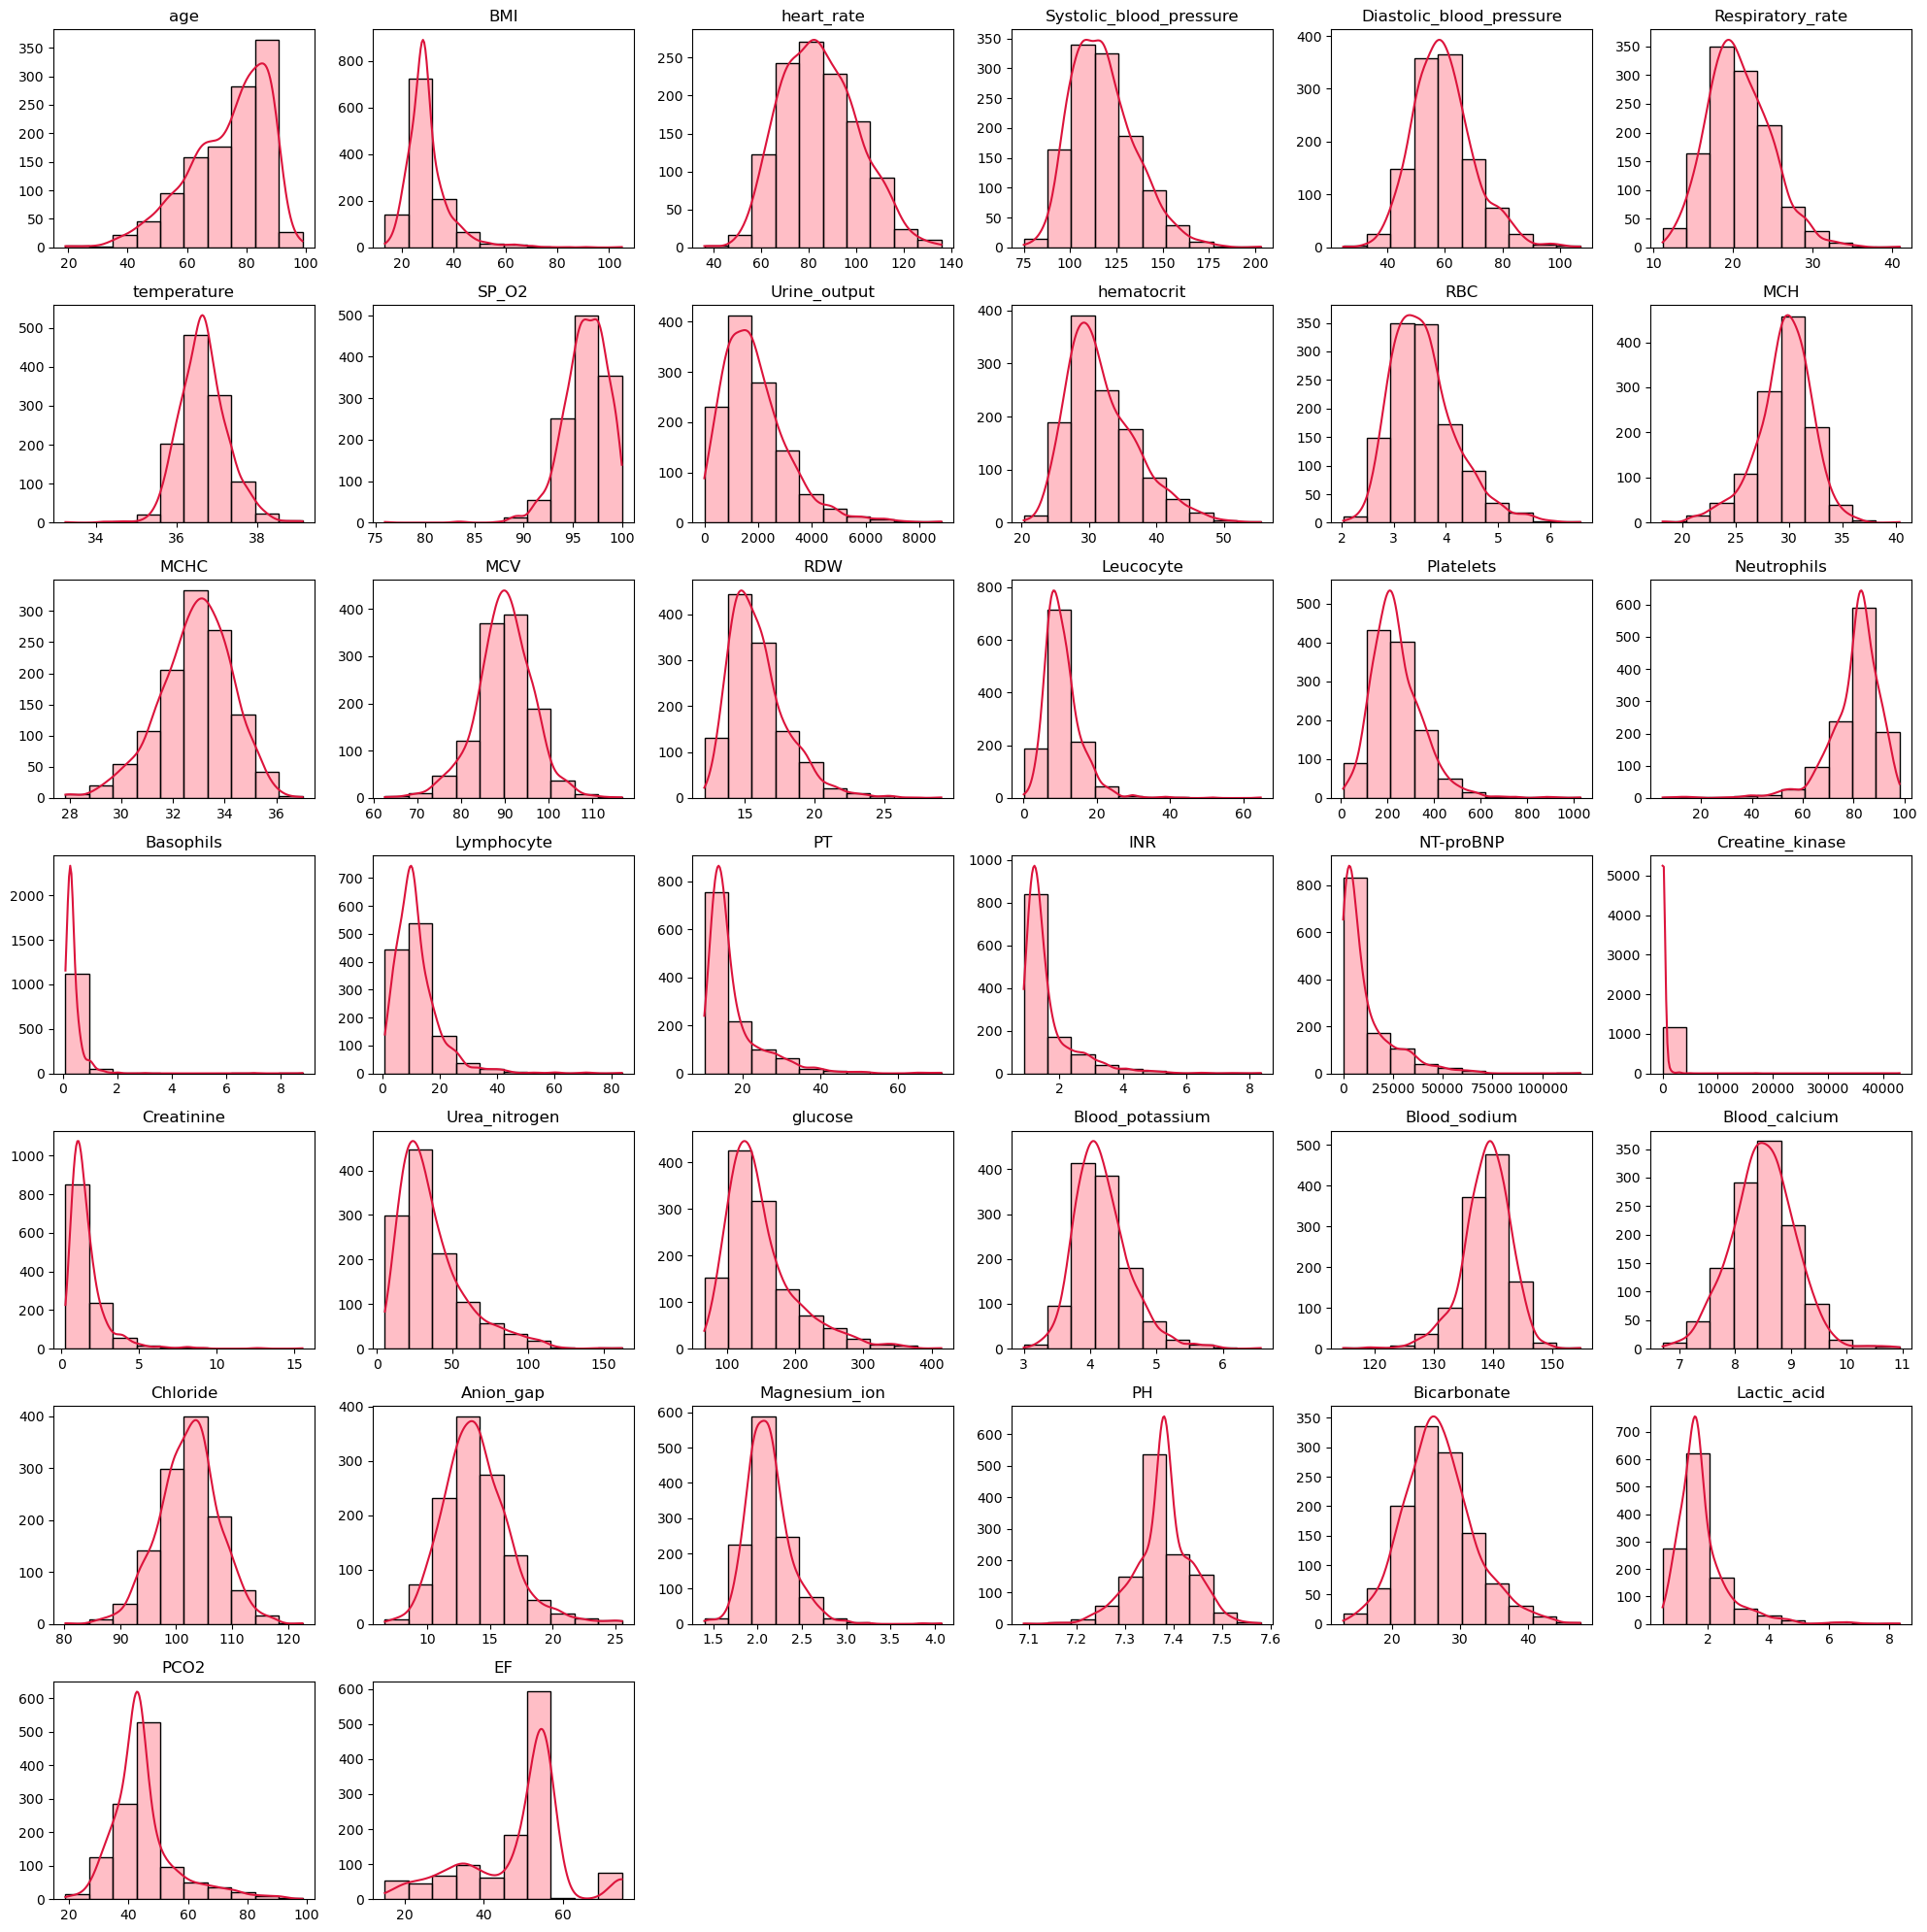

In [147]:
#set up subplot variables for ease of visualization
pal =sns.set_palette(sns.color_palette(['#FF7E8F']))
fig, ax = plt.subplots(7,6,figsize=(20,20))
ax = ax.ravel()
pos = 0
n = df.shape[0]

#plot Hisograms with kde 
for column in df.select_dtypes(exclude="category").columns:
    w = (df[column].max() - df[column].min())/np.sqrt(n)
    sns.histplot(data = df[column], ax=ax[pos], kde=True, bins=10).set_title(column)
    ax[pos].set(xlabel = None, ylabel=None)
    ax[pos].lines[0].set_color('crimson')
    pos+=1


#formatting subplot
plt.tight_layout()
#remove unused subplot axes
for i in range(38,42):
        plt.delaxes(ax[i])

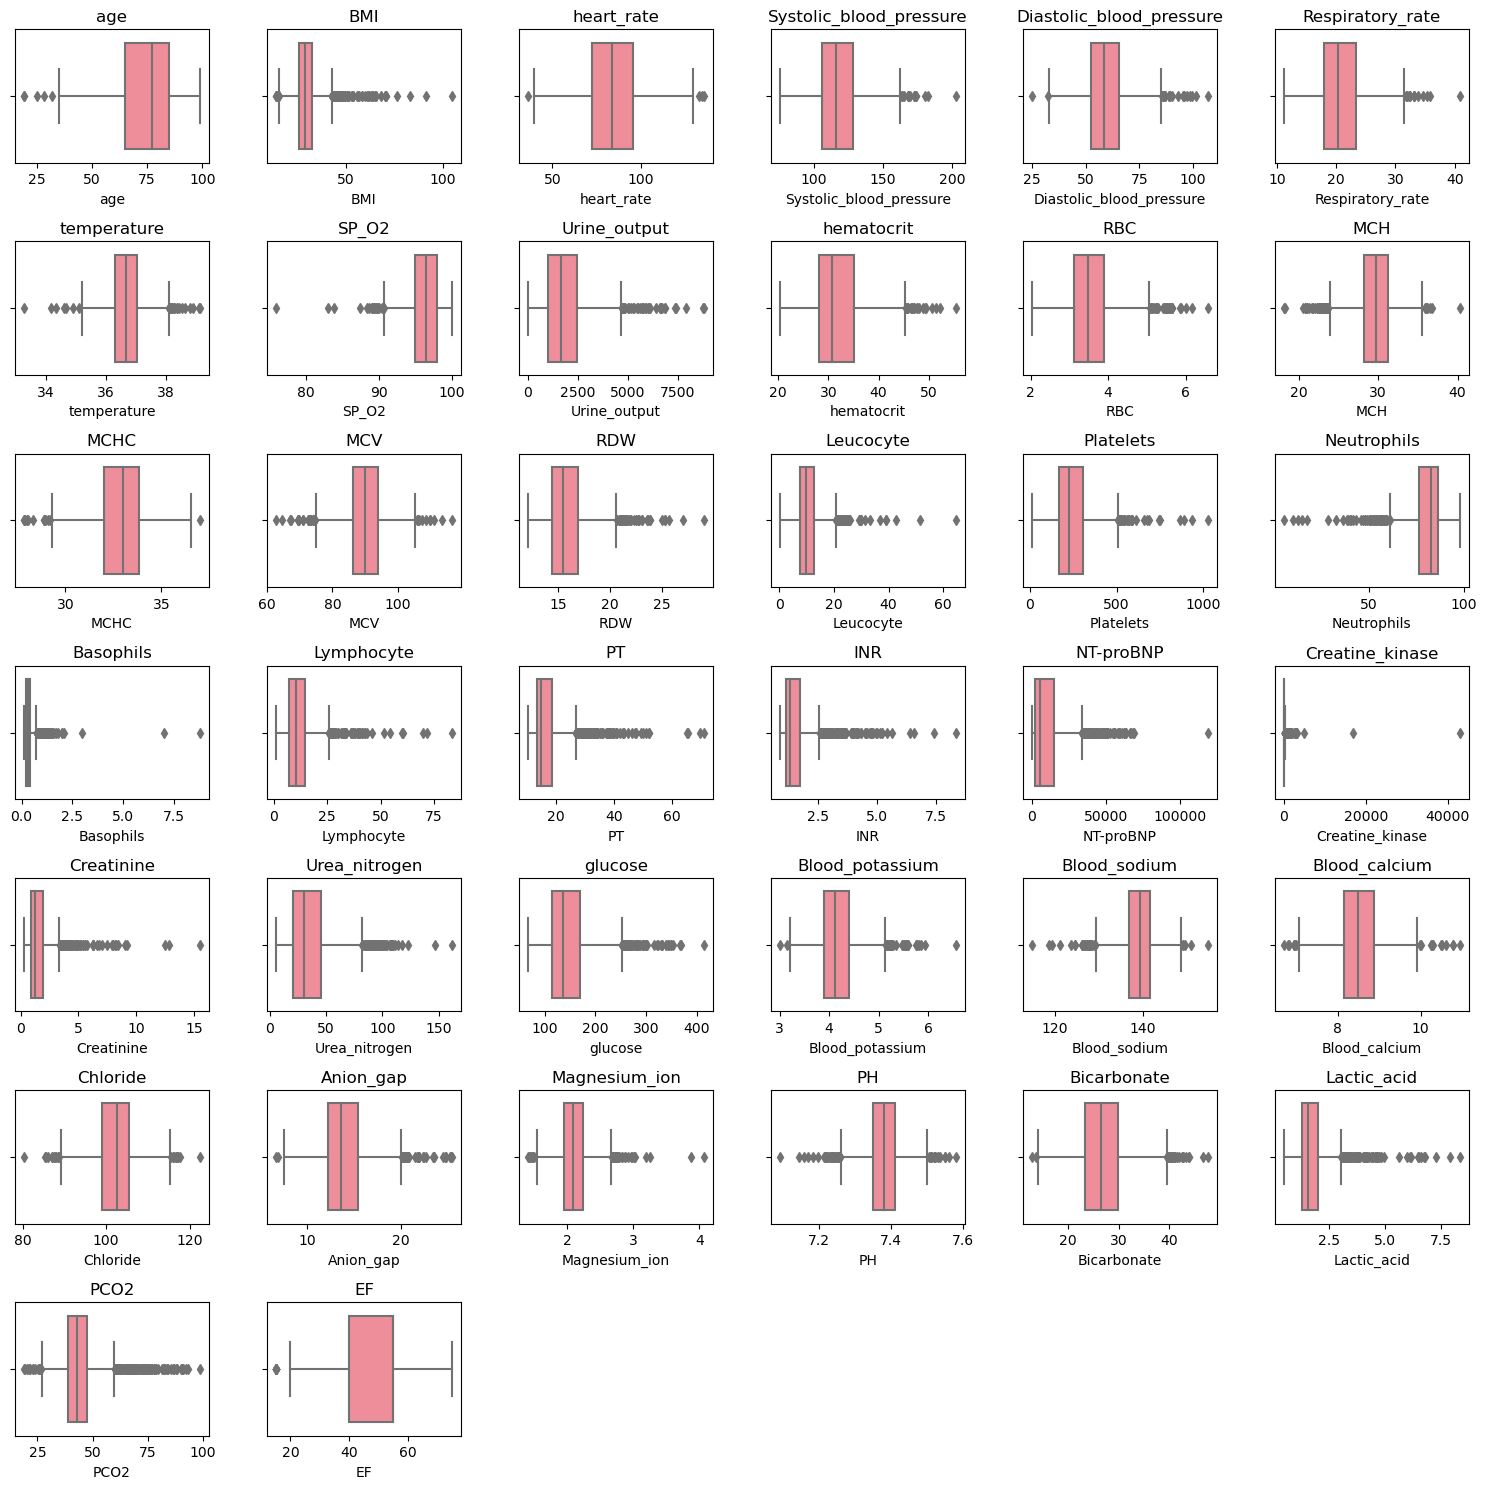

In [148]:
#define color
pal =sns.set_palette(sns.color_palette(['#FF7E8F']))
#set up subplot variables for ease of visualization
fig, ax = plt.subplots(7,6,figsize=(15,15))
ax = ax.ravel()
pos = 0
#plot violin plots with data points outside of the lower and upper bounds marked 
for column in df.columns:
    if (df[column].dtype != "category"):
        sns.boxplot(data = df, x = column, ax=ax[pos],palette=pal)
        #sns.scatterplot(x=outliers(column),y=0,marker='D',color='red',ax=ax[pos],s=10)
        ax[pos].set_title(column)
        pos+=1

#formatting subplot
plt.tight_layout()
#remove unused subplot axes
for i in range(38,42):
        plt.delaxes(ax[i])

In [149]:
df = df[df['age'] >35]
df = df[df['BMI'] < 50]
df = df[df['heart_rate'] < 130]
df = df[df['Systolic_blood_pressure'] < 170]
df = df[df['Diastolic_blood_pressure'] < 95]
df = df[df['Diastolic_blood_pressure'] > 30]
df = df[df['Respiratory_rate'] < 33]
df = df[df['temperature'] < 38.5]
df = df[df['temperature'] > 34.5]
df = df[df['SP_O2'] > 88]
df = df[df['Urine_output'] < 6000]
df = df[df['hematocrit'] < 50]
df = df[df['RBC'] < 5.8]
df = df[df['MCH'] > 20]
df = df[df['MCH'] < 40]
df = df[df['MCHC'] >28]
df = df[df['MCHC'] <37]
df = df[df['MCV'] > 68]
df = df[df['MCV'] < 111]
df = df[df['RDW'] < 25]
df = df[df['Leucocyte'] < 30]
df = df[df['Platelets'] < 800]
df = df[df['Neutrophils'] > 30]
df = df[df['Basophils'] < 2]
df = df[df['Lymphocyte'] < 50]
df = df[df['PT'] < 60]
df = df[df['INR'] < 6]
df = df[df['NT-proBNP'] < 70000]
df = df[df['Creatine_kinase'] < 6000]
df = df[df['Creatinine'] < 9]
df = df[df['Urea_nitrogen'] < 112]
df = df[df['glucose'] < 360]
df = df[df['Blood_potassium'] < 6]
df = df[df['Blood_sodium'] >125]
df = df[df['Blood_sodium'] <150]
df = df[df['Chloride'] <120]
df = df[df['Chloride'] >81]
df = df[df['Anion_gap'] < 23]
df = df[df['Anion_gap'] > 7.5]
df = df[df['Magnesium_ion'] < 3.5]
df = df[df['PH'] > 7.1]
df = df[df['Bicarbonate'] < 45]
df = df[df['Lactic_acid'] < 5.5]
df = df[df['PCO2'] < 95]

In [150]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1015 entries, 0 to 1176
Data columns (total 49 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   outcome                   1015 non-null   category
 1   age                       1015 non-null   int64   
 2   gendera                   1015 non-null   category
 3   BMI                       1015 non-null   float64 
 4   hypertensive              1015 non-null   category
 5   atrialfibrillation        1015 non-null   category
 6   CHD_with_no_MI            1015 non-null   category
 7   diabetes                  1015 non-null   category
 8   deficiencyanemias         1015 non-null   category
 9   depression                1015 non-null   category
 10  Hyperlipemia              1015 non-null   category
 11  Renal_failure             1015 non-null   category
 12  COPD                      1015 non-null   category
 13  heart_rate                1015 non-null   float6

### Resampling of data

In [151]:
df['outcome'].value_counts()

0.0    896
1.0    119
Name: outcome, dtype: int64

#### As we can see there are only 159 rows for prediction label '1'. So, to deal with this we are resampling data

In [152]:
from sklearn.utils import resample

# Separate input features and target
X=df.loc[:, df.columns != 'outcome'] #independent features
y = df['outcome'] #dependent features

# setting up testing and training sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=27)

# concatenate our training data back together
train_df = pd.concat([X_train, y_train], axis=1)

# separate minority and majority classes
outcome_zero = train_df[train_df.outcome==0]
outcome_one = train_df[train_df.outcome==1]

# upsample minority
outcome_one_upsampled = resample(outcome_one,
                          replace=True, # sample with replacement
                          n_samples=len(outcome_zero), # match number in majority class
                          random_state=27) # reproducible results

#defining X for models
# combine majority and upsampled minority
train_df = pd.concat([outcome_zero, outcome_one_upsampled])

#reset index 
train_df = train_df.reset_index(drop = True)

# check new class counts
print(train_df.outcome.value_counts())

# concatenate our testing data back together
test_df = pd.concat([X_test,y_test],axis=1)

0.0    711
1.0    711
Name: outcome, dtype: int64


### Divide into categorical and numerical 

In [153]:
# Categorical dataframe including target variable
cat_df = train_df.select_dtypes(include='category')
num_df = train_df.drop(['gendera','hypertensive','atrialfibrillation','CHD_with_no_MI','diabetes','deficiencyanemias',
                  'depression','Hyperlipemia','Renal_failure','COPD'], axis=1)

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.


<AxesSubplot:>

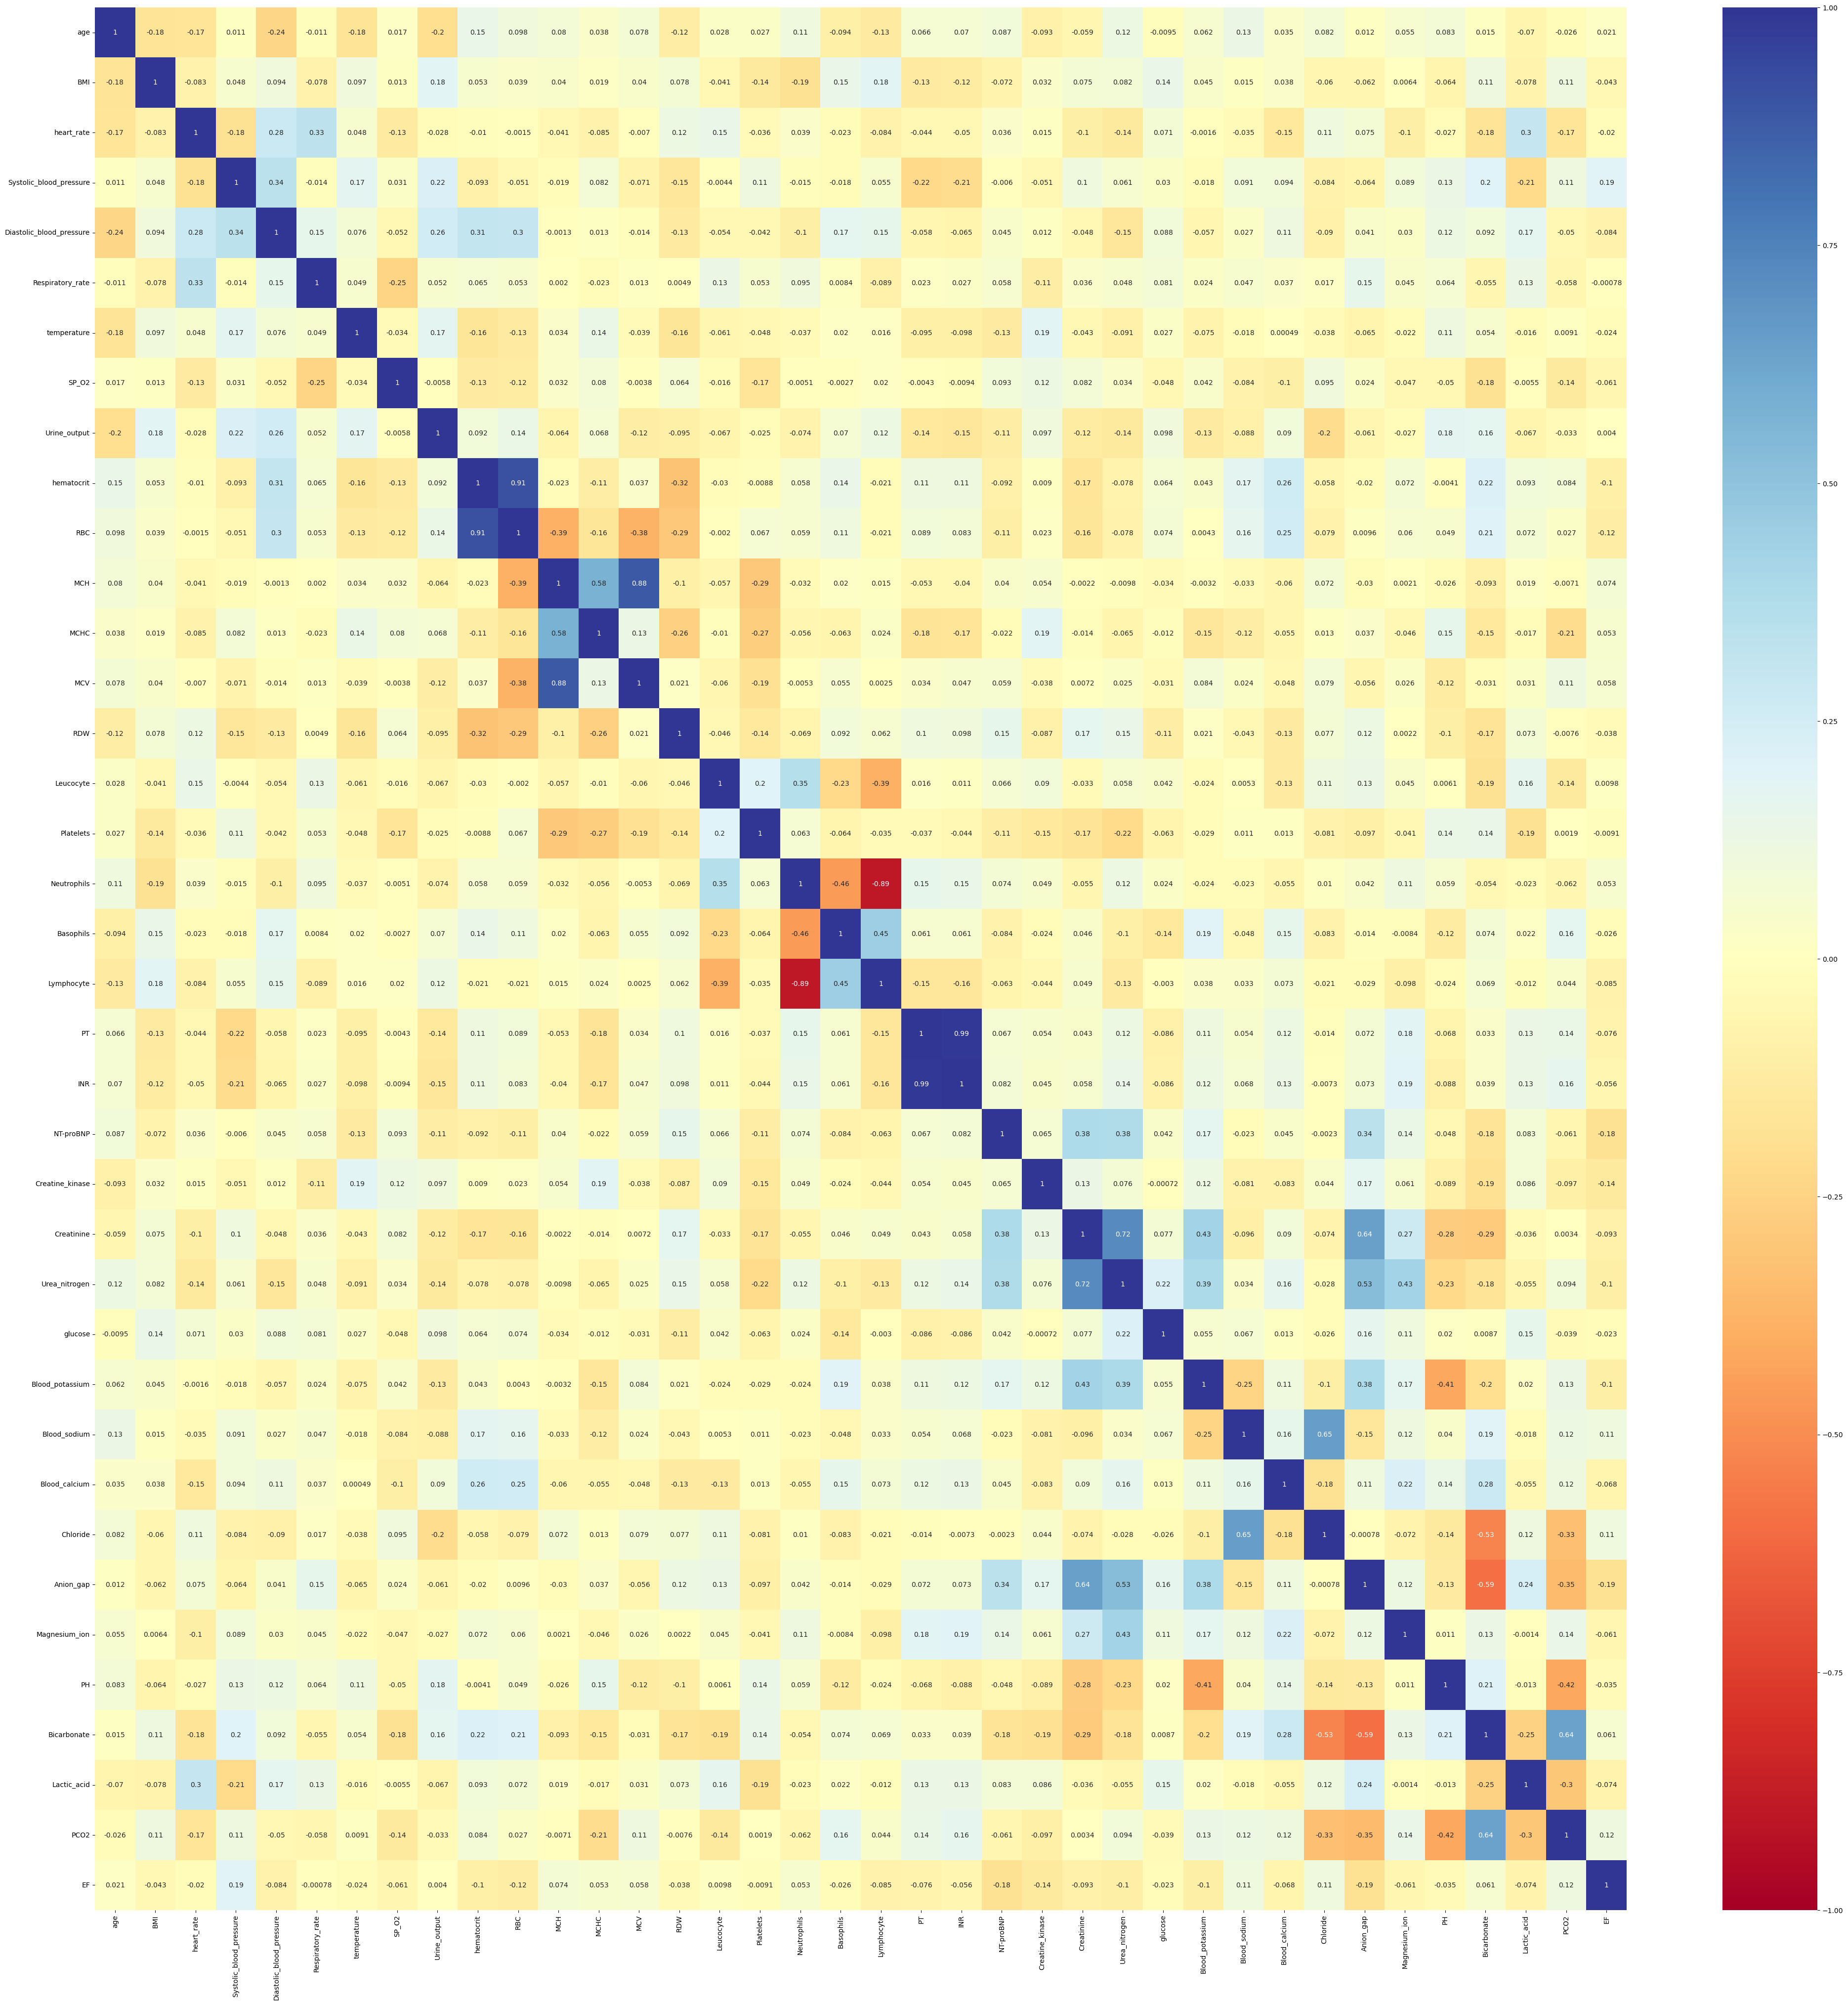

In [154]:
plt.figure(figsize=(50,50))
sns.heatmap(num_df.corr(),annot=True,cmap="RdYlBu",vmin=-1,vmax=1,center = 0)

### Feature Selection

In [155]:
#StandardScaler continous features 
sc=StandardScaler()
train_df[list(num_df.drop('outcome',axis=1).columns)] = sc.fit_transform(train_df[list(num_df.drop('outcome',axis=1).columns)])
test_df[list(num_df.drop('outcome',axis=1).columns)] = sc.fit_transform(test_df[list(num_df.drop('outcome',axis=1).columns)])


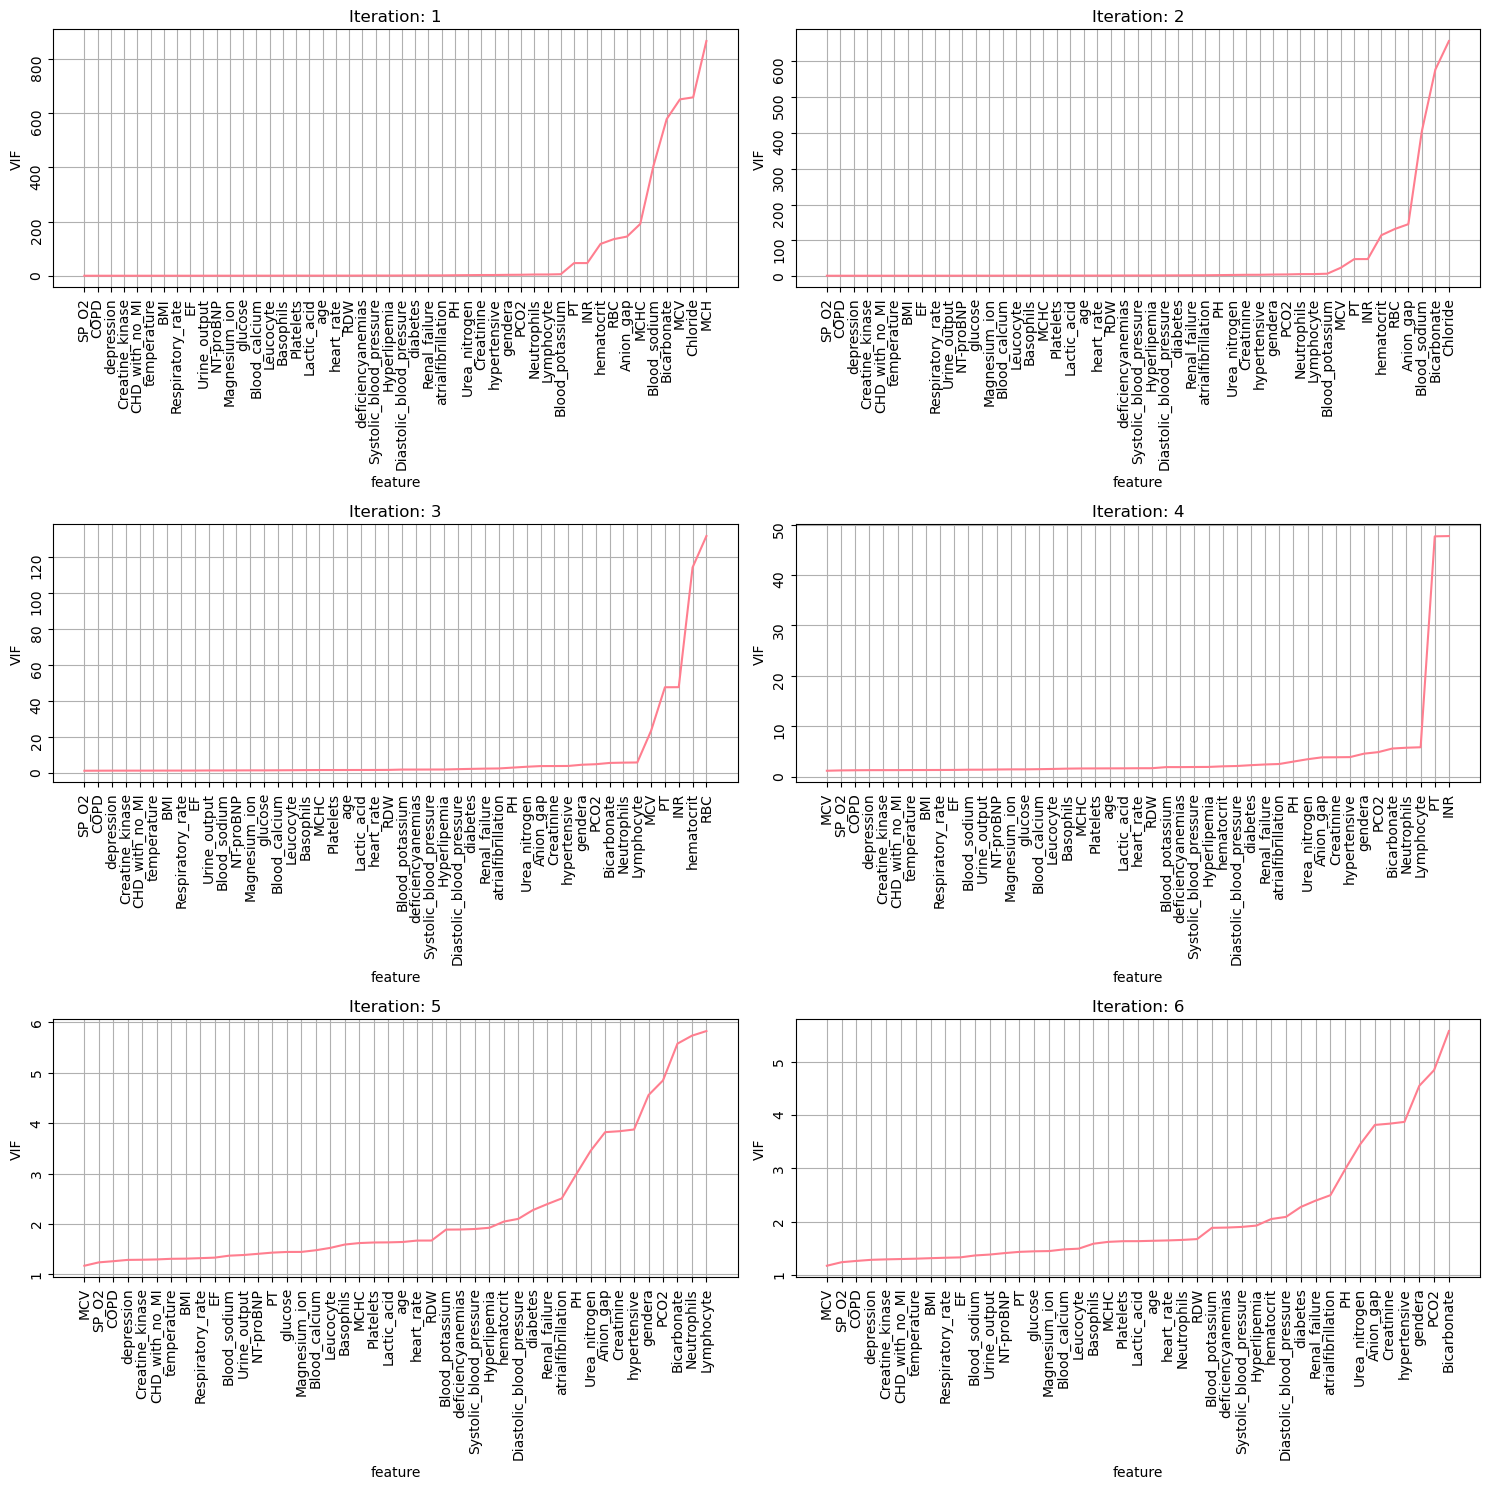

In [156]:
#Define new dataframe for VIF calculations, dropping target variable 
data = train_df.drop(['outcome'],axis=1)

#Define threhold of 5 for VIF, which is the convervative limit for when variables show multicollinearity 
thres = 5

#Counter variables
count = 0
pos = 0

#figures for plotting 
fig, ax = plt.subplots(3,2,figsize=(15,15))
ax = ax.ravel()

#iterative VIF calculations 
while True:
    Cols = range(data.shape[1])
    
    vif = pd.DataFrame([variance_inflation_factor(data.values,i) for i in Cols],columns=['VIF'])
    vif['feature'] = data.columns
    
    if vif['VIF'].max() < thres:
        break
    else:
        Cols = np.delete(Cols, vif['VIF'].idxmax())
        data = data.iloc[:,Cols]
        count+=1
        if count % 1 == 0:
            sns.lineplot(data=vif.sort_values('VIF'),x='feature',y='VIF',ax=ax[pos])
            ax[pos].tick_params(labelrotation=90)
            ax[pos].grid()
            ax[pos].set_title('Iteration: %i' % count)
            pos+=1
            
plt.tight_layout()

In [157]:
# Resultant features after VIF analysis
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1422 entries, 0 to 1421
Data columns (total 42 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   age                       1422 non-null   float64 
 1   gendera                   1422 non-null   category
 2   BMI                       1422 non-null   float64 
 3   hypertensive              1422 non-null   category
 4   atrialfibrillation        1422 non-null   category
 5   CHD_with_no_MI            1422 non-null   category
 6   diabetes                  1422 non-null   category
 7   deficiencyanemias         1422 non-null   category
 8   depression                1422 non-null   category
 9   Hyperlipemia              1422 non-null   category
 10  Renal_failure             1422 non-null   category
 11  COPD                      1422 non-null   category
 12  heart_rate                1422 non-null   float64 
 13  Systolic_blood_pressure   1422 non-null   float6

In [158]:
catlist=list(data.select_dtypes(include='category').columns)
catlist.append('outcome')
numlist=list(data.select_dtypes(exclude='category').columns)
numlist.append('outcome')

# Define categorical and continous dataframes based on VIF results 
cat_df = train_df[catlist]
num_df = train_df[numlist]

In [159]:
cat_df['outcome'].value_counts()

0.0    711
1.0    711
Name: outcome, dtype: int64

In [160]:
# #Feature Selection using Lasso
x = num_df.loc[:, num_df.columns != 'outcome']
y = num_df['outcome']


#StandardScaler
#sc=StandardScaler()
#sc.fit(x)
#x=sc.transform(x)


#Train test split in 80:20 ratio
#x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)



lasso_model = linear_model.Lasso(alpha=0.01,
                               positive=True,
                               fit_intercept=False, 
                               max_iter=1000,
                               tol=0.0001)
lasso_model.fit(x, y)

coeff  = lasso_model.coef_
df_coeff = pd.DataFrame({'Features':num_df.columns[1:], 'scores': coeff})


selected_features = (list(df_coeff[df_coeff['scores'] > 0]['Features']))


print("Feature Selection using Lasso")
print(df_coeff.sort_values(by='scores',ascending=False))
# eli5.show_weights(lasso_model, top=-1, feature_names = num_df.columns[1:].tolist())

Feature Selection using Lasso
                    Features    scores
2    Systolic_blood_pressure  0.119059
13                 Platelets  0.082613
21                   glucose  0.069173
11                       RDW  0.056718
12                 Leucocyte  0.049238
15                 Basophils  0.043986
0                        BMI  0.039739
26             Magnesium_ion  0.034246
5                temperature  0.033872
30                        EF  0.026098
31                   outcome  0.021230
7               Urine_output  0.013454
17                 NT-proBNP  0.011882
23              Blood_sodium  0.011139
29                      PCO2  0.005333
19                Creatinine  0.003469
10                       MCV  0.000000
3   Diastolic_blood_pressure  0.000000
28               Lactic_acid  0.000000
27                        PH  0.000000
4           Respiratory_rate  0.000000
25                 Anion_gap  0.000000
24             Blood_calcium  0.000000
6                      SP_O2  0.00

In [161]:
#feature selection using Ridge

x = num_df.loc[:, num_df.columns != 'outcome'].values #independent features
y = num_df['outcome'].values #dependent features


validation_size=0.20 #split size: 80:20
seed=42 

#StandardScaler
#sc=StandardScaler()
#sc.fit(x)
#x=sc.transform(x)

#Train test split in 80:20 ratio
#x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=validation_size,random_state=seed)

'''
alpha=1.0 #0.1 learning rate
ridge =Ridge(alpha=alpha)


y_pred_ridge = ridge.fit(x,y).predict(test_df.drop('outcome',axis=1).values)
r2_score_ridge=r2_score(test_df['outcome'].values,y_pred_ridge)

print("r^2 on test data: %f " % r2_score_ridge)
predictors=num_df.columns.values[1:]


coef=pd.Series(ridge.coef_,predictors).sort_values()
coef.plot(kind='bar',title='Modal Coefficient')
'''

'\nalpha=1.0 #0.1 learning rate\nridge =Ridge(alpha=alpha)\n\n\ny_pred_ridge = ridge.fit(x,y).predict(test_df.drop(\'outcome\',axis=1).values)\nr2_score_ridge=r2_score(test_df[\'outcome\'].values,y_pred_ridge)\n\nprint("r^2 on test data: %f " % r2_score_ridge)\npredictors=num_df.columns.values[1:]\n\n\ncoef=pd.Series(ridge.coef_,predictors).sort_values()\ncoef.plot(kind=\'bar\',title=\'Modal Coefficient\')\n'

In [162]:

# Feature selection using SelectKBest algorithm

x=num_df.loc[:, num_df.columns != 'outcome'].values
y = num_df['outcome'].values
z=num_df.iloc[:,0:num_df.shape[1]-1]



selector=SelectKBest(f_classif,k='all')

X_new=selector.fit_transform(x,y)
names=z.columns.values[selector.get_support()]

 
scores=selector.scores_[selector.get_support()]

#combining the columns name and scores
name_scores=list(zip(names,scores))

#creating a dataframe
ns_df=pd.DataFrame(data=name_scores,columns=['Feat_names','F_scores'])

#sort the dataframe for better visualization
ns_df_sorted=ns_df.sort_values(['F_scores','Feat_names'],ascending=[False,True])
print(ns_df_sorted)


                  Feat_names    F_scores
2                 heart_rate  122.196888
13                 Leucocyte  105.360705
21             Urea_nitrogen   76.176976
26                 Anion_gap   65.606751
5           Respiratory_rate   62.855745
15               Neutrophils   62.691909
8               Urine_output   62.356475
12                       RDW   36.560411
25             Blood_calcium   35.847276
23           Blood_potassium   29.053627
11                       MCV   28.847766
28                        PH   26.525539
29               Lactic_acid   26.153972
16                 Basophils   22.666005
14                 Platelets   17.113970
18                 NT-proBNP   17.111629
17                        PT   14.389813
3    Systolic_blood_pressure   12.531242
0                        age   11.536892
27             Magnesium_ion   10.484290
20                Creatinine   10.339946
1                        BMI   10.009072
4   Diastolic_blood_pressure    6.376392
9               

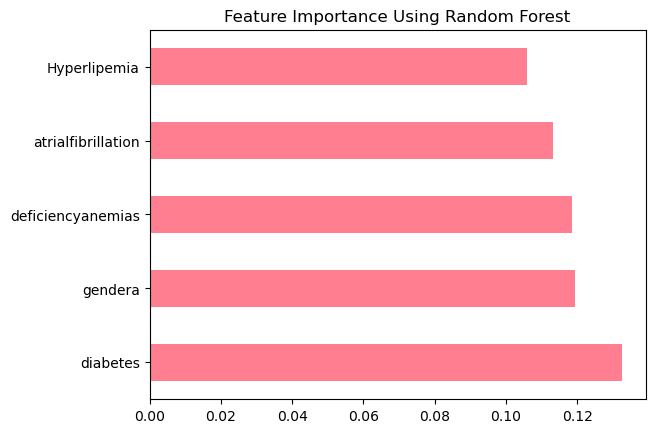

In [163]:
#Feature selection using Random Forest

x=cat_df.loc[:, cat_df.columns != 'outcome']
y = cat_df['outcome']

model = RandomForestClassifier()
model.fit(x,y)

# print(model.feature_importances_) #use inbuilt class feature_importances of random based classifiers

#plotting graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=x.columns)
feat_importances.nlargest(5).plot(kind='barh')
plt.title("Feature Importance Using Random Forest")
plt.show()


In [164]:
#selected features
features_random_forest = list(feat_importances.index)
print("Selected Categorical Features")
print(features_random_forest)
print('\n')

print("Selected Numerical Features")
print(selected_features)

# update cat and num dataframes
cat_df = cat_df[features_random_forest]
cat_df['outcome'] = train_df['outcome']
num_df = num_df[selected_features]
num_df['outcome'] = train_df['outcome']

Selected Categorical Features
['gendera', 'hypertensive', 'atrialfibrillation', 'CHD_with_no_MI', 'diabetes', 'deficiencyanemias', 'depression', 'Hyperlipemia', 'Renal_failure', 'COPD']


Selected Numerical Features
['BMI', 'Systolic_blood_pressure', 'temperature', 'Urine_output', 'RDW', 'Leucocyte', 'Platelets', 'Basophils', 'NT-proBNP', 'Creatinine', 'glucose', 'Blood_sodium', 'Magnesium_ion', 'PCO2', 'EF', 'outcome']


In [165]:
feature = features_random_forest + ['outcome']

In [166]:
#reduce dimensions of test_df
all_features = features_random_forest + selected_features
test_df = test_df[all_features]
test_cat_df = test_df[feature]
test_num_df = test_df[selected_features]

# Below cell needs to be adjusted

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.


Index(['age', 'BMI', 'heart_rate', 'Systolic_blood_pressure',
       'Diastolic_blood_pressure', 'Respiratory_rate', 'temperature', 'SP_O2',
       'Urine_output', 'hematocrit', 'RBC', 'MCH', 'MCHC', 'MCV', 'RDW',
       'Leucocyte', 'Platelets', 'Neutrophils', 'Basophils', 'Lymphocyte',
       'PT', 'INR', 'NT-proBNP', 'Creatine_kinase', 'Creatinine',
       'Urea_nitrogen', 'glucose', 'Blood_potassium', 'Blood_sodium',
       'Blood_calcium', 'Chloride', 'Anion_gap', 'Magnesium_ion', 'PH',
       'Bicarbonate', 'Lactic_acid', 'PCO2', 'EF'],
      dtype='object')


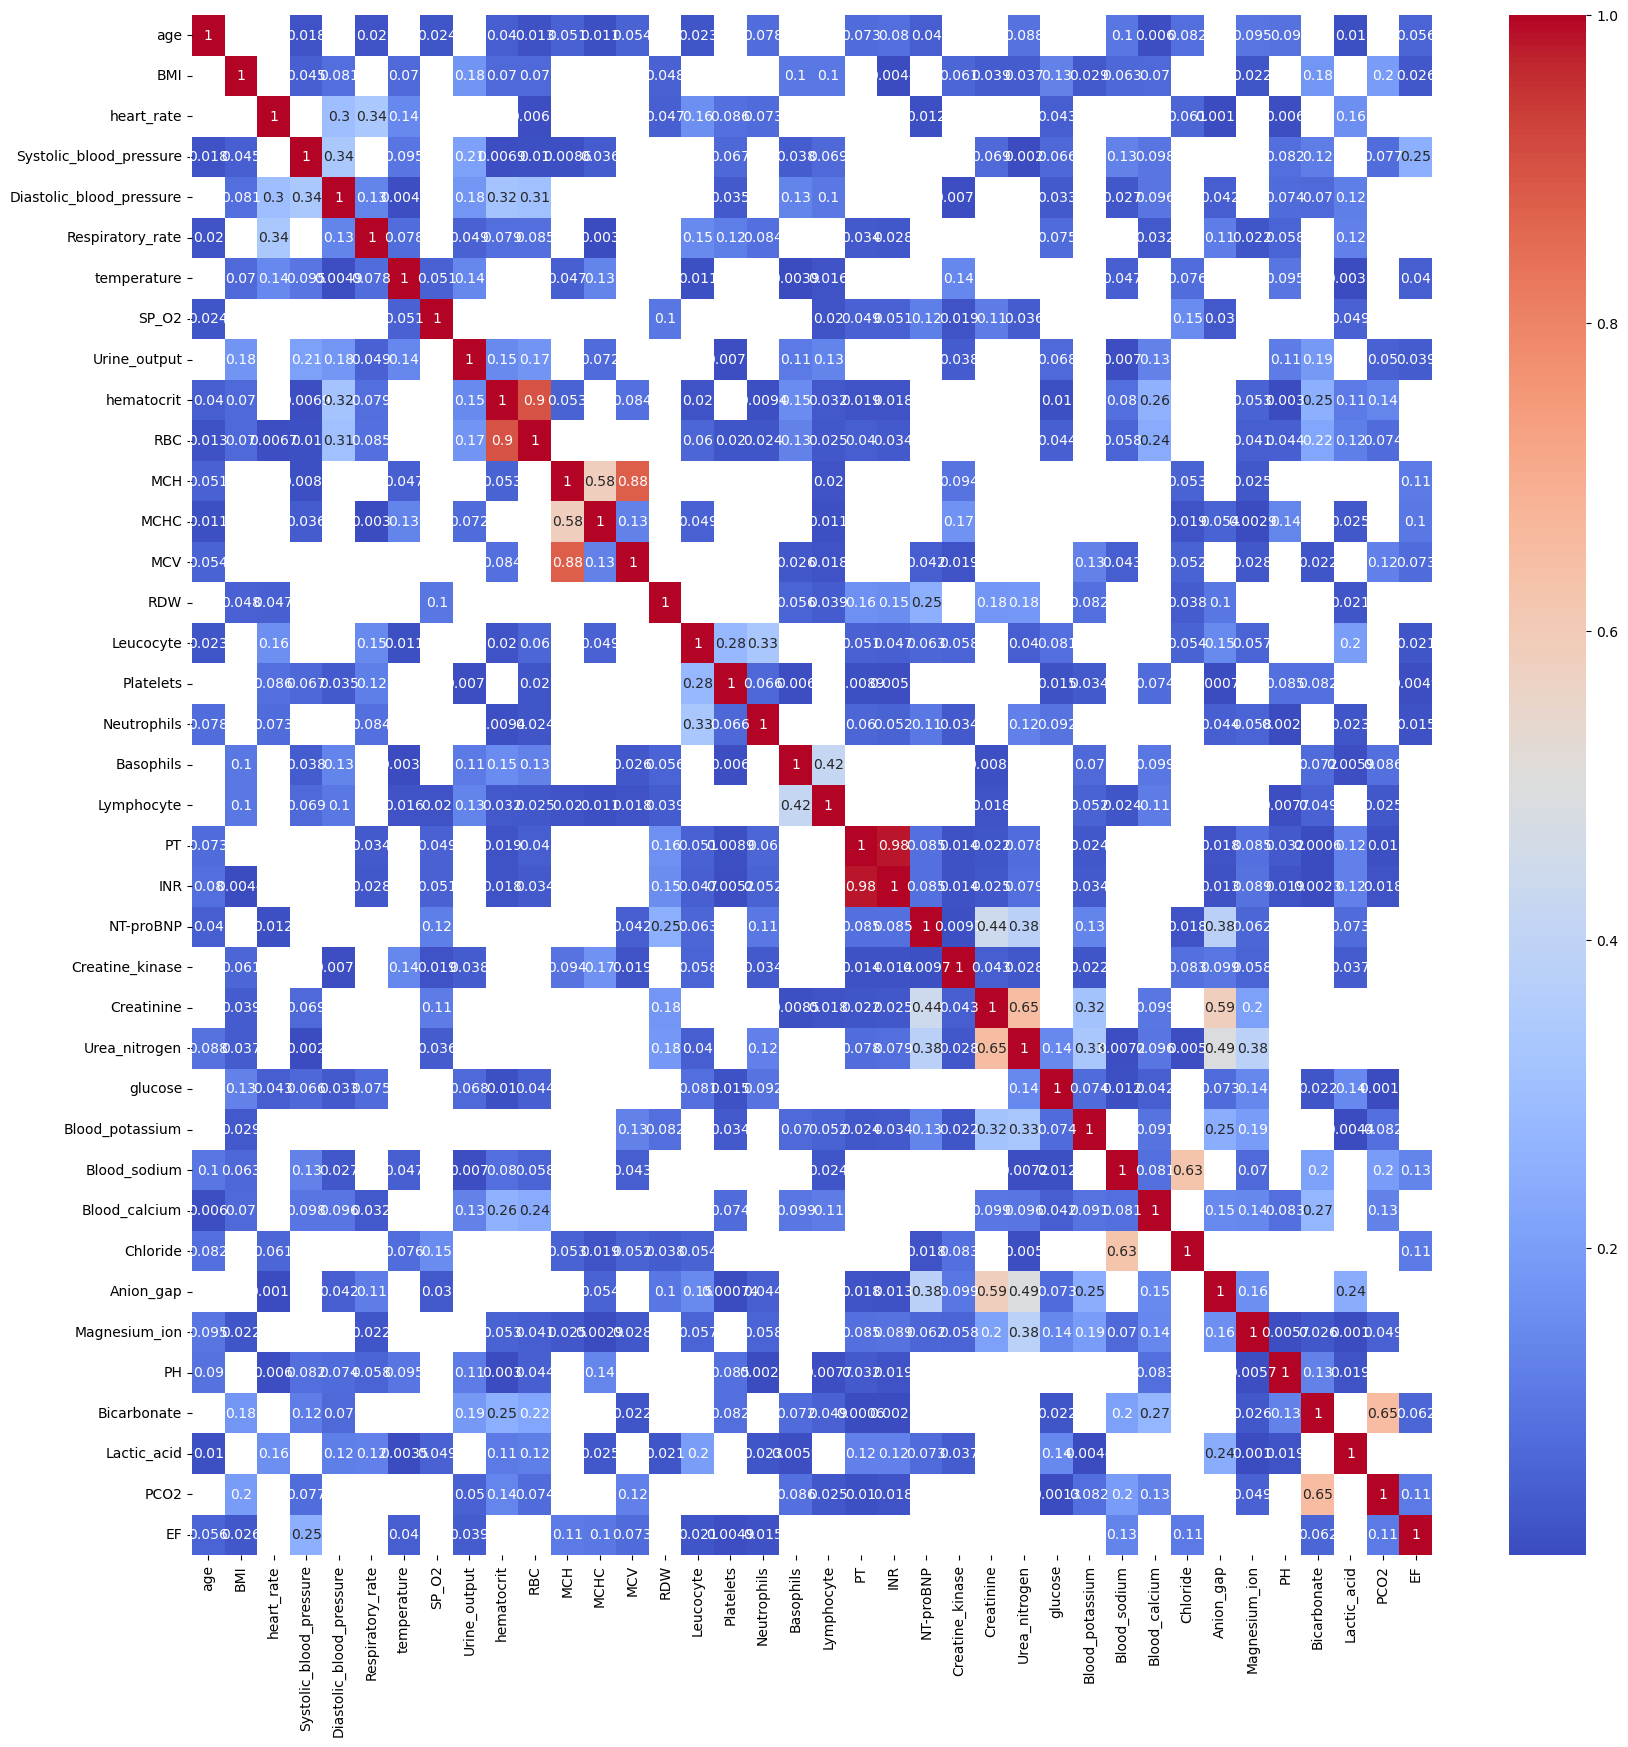

In [38]:
#get correlations of each features in dataset
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="coolwarm" ,mask =  corrmat <0.0)
print(top_corr_features)

In [39]:
# Replace values in gender column with 0 and 1
#df['gendera'] = df['gendera'].apply(lambda x: '0' if x == 1 else '1')

#### Additional EDA

In [40]:
#pairplot after feature selection
#sns.pairplot(num_df, hue='outcome')

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.


<AxesSubplot:>

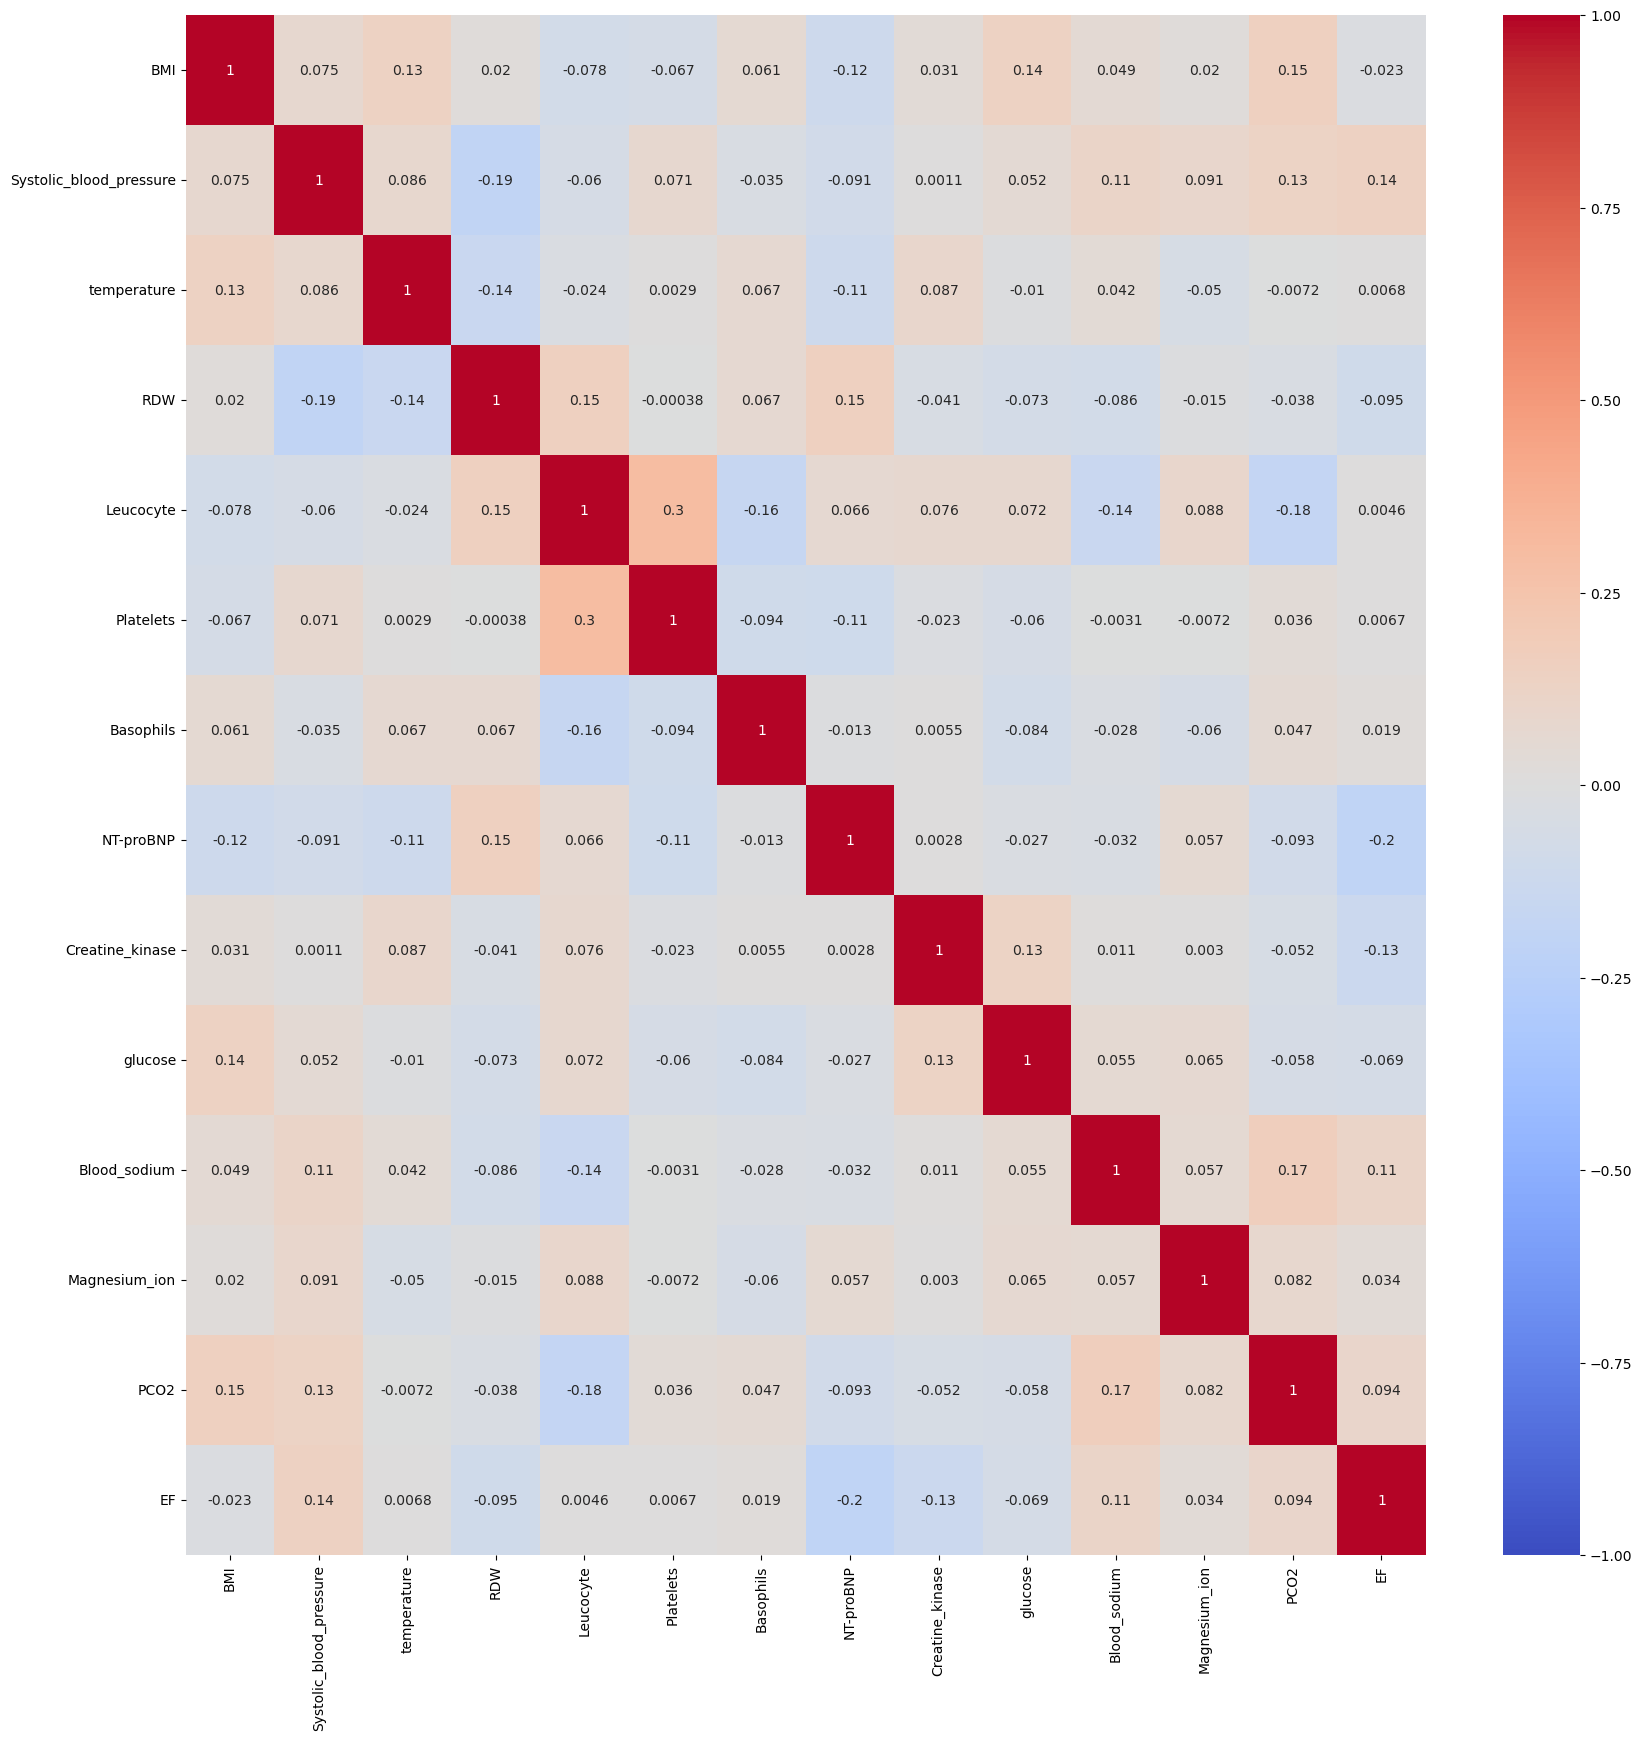

In [41]:
# Heatmap for numerical variable after feature selection
plt.figure(figsize=(20,20))
sns.heatmap(num_df.corr(),annot=True,cmap="coolwarm",vmin=-1,vmax=1,center = 0)

### PCA

**Target Variable:** Outcome
* 0 - Alive
* 1 - Death

The first preprocessing step is to divide the dataset into a feature set and corresponding labels

In [196]:
X = num_df.drop(['outcome'], axis=1)
y = num_df['outcome']

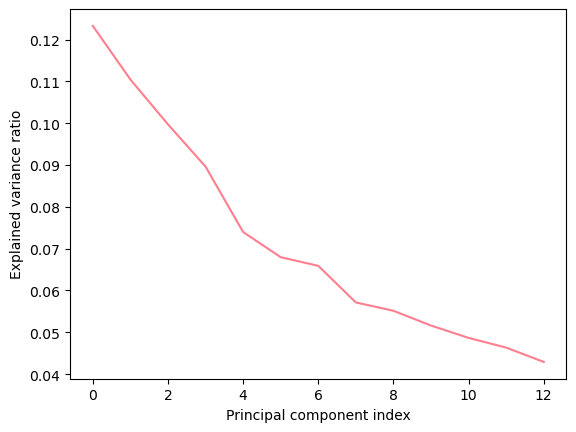

In [197]:
# Checking for how many components should keep
# Build the pipeline
pipe = Pipeline([('reducer', PCA(.90))])

# Fit the pipeline to poke_df and transform the data
pipe.fit(X)
var = pipe['reducer'].explained_variance_ratio_

plt.plot(var)

plt.xlabel('Principal component index')
plt.ylabel('Explained variance ratio')
plt.show()

From this graph after checking elbow point we can say we should keep 4 components. 

In [198]:
# performing standard scalar normalization to normalize our feature set
#sc = StandardScaler()
#X_sc = sc.fit_transform(X)

In [200]:
# Applying pca
pca = PCA(.90)
X_pca= pca.fit_transform(X)

In [201]:
print(pca.explained_variance_ratio_)

[0.12325393 0.11044283 0.09971865 0.08962272 0.07397488 0.0679595
 0.06589231 0.05714029 0.05514891 0.05162013 0.04866742 0.04634589
 0.0429208 ]


In [202]:
pca.explained_variance_ratio_.sum()

0.9327082631257452

Let's plot a Scree Plot which will  explained variance.

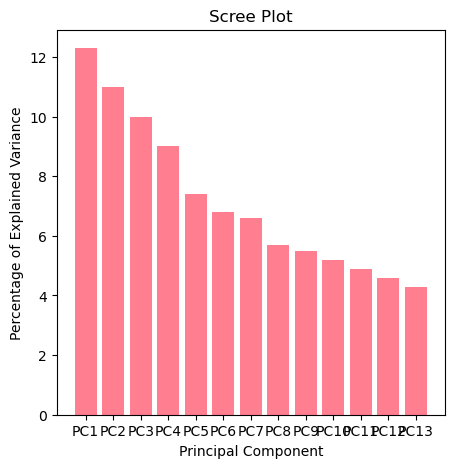

In [203]:
per_var = np.round(pca.explained_variance_ratio_* 100, decimals=1)
labels = ['PC' + str(x) for x in range(1, len(per_var)+1)]
plt. figure(figsize=(5,5))
plt.bar(x=range(1,len(per_var)+1), height=per_var, tick_label=labels)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Component')
plt.title('Scree Plot')
plt.show()

In [195]:
# This changes the numpy array output back to a DataFrame
X_pc_df = pd.DataFrame(X_pca, columns=['PC1', 'PC2', 'PC3','PC4','PC5'])

print(X_pc_df.head())

ValueError: Shape of passed values is (1422, 2), indices imply (1422, 5)

### Modeling

#### Logistic Regression

In [207]:
# using PCA data
X = num_df.drop('outcome',axis=1).values
y = num_df['outcome'].values

In [208]:
model = LogisticRegression()
model.fit(X,y)
predictions = model.predict(X)

In [209]:
print('Accuracy Score: ', accuracy_score(y, predictions))
print('Confusion Matrix: \n', confusion_matrix(y,predictions))
print('Classification Report: \n', classification_report(y,predictions))

Accuracy Score:  0.6926863572433193
Confusion Matrix: 
 [[486 225]
 [212 499]]
Classification Report: 
               precision    recall  f1-score   support

         0.0       0.70      0.68      0.69       711
         1.0       0.69      0.70      0.70       711

    accuracy                           0.69      1422
   macro avg       0.69      0.69      0.69      1422
weighted avg       0.69      0.69      0.69      1422



In [210]:
test_num_df.outcome.value_counts()

0.0    185
1.0     18
Name: outcome, dtype: int64

In [211]:
num_df.outcome.value_counts()

0.0    711
1.0    711
Name: outcome, dtype: int64

In [212]:
import scikitplot as skplt
skplt.metrics.plot_confusion_matrix(y_test, predictions, normalize=False, title = 'Confusion Matrix')

ModuleNotFoundError: No module named 'scikitplot'

#### Random Forest

# change to decision tree

In [91]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [100]:
#pipeline for random forest
steps_forest = [('random_forest', RandomForestClassifier())]
forest_pipeline = Pipeline(steps_forest)

#params for GridSearchCV
params = {'random_forest__n_estimators': [25,50,100,150,200,250,300],
         'random_forest__criterion': ['gini','entropy'],
         'random_forest__max_features':['sqrt','log2',None]}

#list(forest_pipeline.get_params().keys())

In [101]:
cv = GridSearchCV(forest_pipeline, param_grid = params)
cv.fit(cat_df.drop('outcome',axis=1).values, cat_df['outcome'].values)
#predictions_forest = cv.predict(test_cat_df.drop('outcome',axis=1).values)

GridSearchCV(estimator=Pipeline(steps=[('random_forest',
                                        RandomForestClassifier())]),
             param_grid={'random_forest__criterion': ['gini', 'entropy'],
                         'random_forest__max_features': ['sqrt', 'log2', None],
                         'random_forest__n_estimators': [25, 50, 100, 150, 200,
                                                         250, 300]})

In [102]:
#grid search best parameters and score 
cv.best_params_

{'random_forest__criterion': 'gini',
 'random_forest__max_features': 'sqrt',
 'random_forest__n_estimators': 150}

In [103]:
#grid search best score
cv.best_score_

0.7512478632478633

In [99]:
print('Accuracy Score: ', accuracy_score(test_cat_df['outcome'].values, predictions_forest))
print('Confusion Matrix: \n', confusion_matrix(test_cat_df['outcome'].values, predictions_forest))
print('Classification Report:\n ', classification_report(test_cat_df['outcome'].values, predictions_forest))

Accuracy Score:  0.6059322033898306
Confusion Matrix: 
 [[129  76]
 [ 17  14]]
Classification Report:
                precision    recall  f1-score   support

         0.0       0.88      0.63      0.74       205
         1.0       0.16      0.45      0.23        31

    accuracy                           0.61       236
   macro avg       0.52      0.54      0.48       236
weighted avg       0.79      0.61      0.67       236



<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

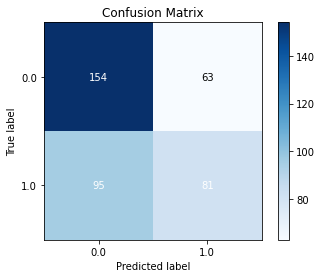

In [62]:
skplt.metrics.plot_confusion_matrix(y_test, predictions, normalize=False, title = 'Confusion Matrix')

In [63]:
#Create Shap object
explainer = shap.TreeExplainer(best_forest)
#Calculate shap values 
shap_values = explainer.shap_values(X_test[1:2])

In [64]:
print(shap_values[0].shape)
# shap_values = explainer.shap_values(X_train)

(1, 9)


In [65]:
shap.initjs()
prediction = best_forest.predict(X_test[1:2])[0]
print(f"The RF predicted: {prediction}")

#visualizing expected outcome for first row of X_test
shap.force_plot(explainer.expected_value[1],
                shap_values[1],
                X_test.values[1], feature_names=X_test.columns) # for values

The RF predicted: 1.0


In [66]:
# y_test.values[1]

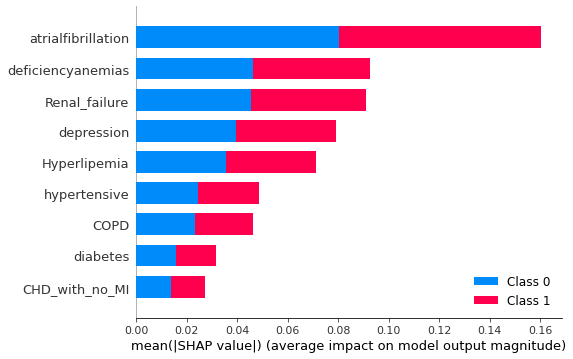

In [67]:
#SHAP feature importance 
shap.summary_plot(shap_values,X_test)

In [68]:
# 
# ## sumaiya random forest
# train,test=train_test_split(cat_df,test_size=0.3,random_state=42,stratify=df['outcome'])

# # Create X_train,Y_train,X_test
# X_train = train.drop(['outcome'], axis=1)
# y_train = train['outcome']

# X_test  = test.drop(['outcome'], axis=1)
# y_test  = test['outcome']
# 

In [69]:
# test.head(20)

hypertensive atrialfibrillation CHD_with_no_MI diabetes  \
647             1                  1              0        0   
1548            0                  1              0        1   
349             0                  0              0        0   
949             1                  1              0        0   
1313            1                  0              0        1   
738             1                  0              0        1   
287             1                  1              0        0   
1402            1                  1              1        1   
48              1                  1              0        1   
227             1                  0              0        1   
749             1                  0              0        0   
471             1                  1              0        0   
906             0                  1              0        1   
101             1                  0              0        1   
585             1                  0              0        1   
32              1                  1              1        0   
950             1                  1              0        1   
478             1                  0              0        1   
1272            1                  1              0        0   
536             1                  1              0        0   

     deficiencyanemias depression Hyperlipemia Renal_failure COPD outcome  
647                  1          0            1             0    0     0.0  
1548                 1          0            0             0    1     1.0  
349                  1          1            0             0    0     0.0  
949                  0          0            0             0    0     1.0  
1313                 0          0            0             0    0     1.0  
738                  1          0            0             1    0     0.0  
287                  1          1            1             0    1     0.0  
1402                 0          0            1             1    0     1.0  
48                   1          0            0             1    1     0.0  
227                  0          0            1             0    0     0.0  
749                  1          0            0             1    0     0.0  
471                  0          0            1             0    0     0.0  
906                  0          0            0             0    0     1.0  
101                  0          1            1             0    0     0.0  
585                  0          0            0             0    0     0.0  
32                   1          0            0             0    0     0.0  
950                  0          0            0             1    0     1.0  
478                  1          0            0             0    1     0.0  
1272                 1          1            0             0    0     1.0  
536                  0          0            1             0    0     0.0

In [70]:
# #pipeline for random forest
# steps_forest = [('random_forest', RandomForestClassifier())]
# forest_pipeline = Pipeline(steps_forest)

# #params for GridSearchCV
# params = {'random_forest__n_estimators': [25,50,100,150,200,250,300],
#          'random_forest__criterion': ['gini','entropy'],
#          'random_forest__max_features':['sqrt','log2',None]}

# #list(forest_pipeline.get_params().keys())

In [71]:
# cv = GridSearchCV(forest_pipeline, param_grid = params)
# cv.fit(X_train, y_train)
# predictions_forest = cv.predict(X_test)

In [72]:
# #grid search best parameters and score 
# cv.best_params_

{'random_forest__criterion': 'entropy',
 'random_forest__max_features': 'sqrt',
 'random_forest__n_estimators': 200}

In [73]:
# #grid search best score
# cv.best_score_

0.7078844652615144

In [74]:
# #create randomforest model with best parameters from gridsearchcv 
# best_forest = RandomForestClassifier(n_estimators = cv.best_params_['random_forest__n_estimators'],criterion = cv.best_params_['random_forest__criterion'], max_features = cv.best_params_['random_forest__max_features'])
# best_forest.fit(X_train, y_train)
# predictions_forest = best_forest.predict(X_test)

In [75]:
# print('Accuracy Score: ', accuracy_score(y_test, predictions_forest))
# print('Confusion Matrix: \n', confusion_matrix(y_test, predictions_forest))
# print('Classification Report:\n ', classification_report(y_test, predictions_forest))

Accuracy Score:  0.7022900763358778
Confusion Matrix: 
 [[117  96]
 [ 21 159]]
Classification Report:
                precision    recall  f1-score   support

         0.0       0.85      0.55      0.67       213
         1.0       0.62      0.88      0.73       180

    accuracy                           0.70       393
   macro avg       0.74      0.72      0.70       393
weighted avg       0.75      0.70      0.70       393



<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

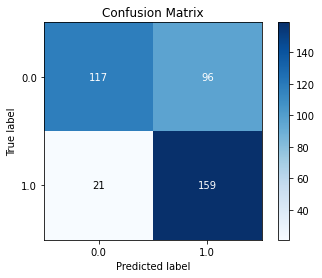

In [76]:
skplt.metrics.plot_confusion_matrix(y_test, predictions_forest, normalize=False, title = 'Confusion Matrix')

In [77]:
#Create Shap object
explainer = shap.TreeExplainer(best_forest)
#Calculate shap values 
#shap_values = explainer.shap_values(X_test[1:2])

In [78]:
##
# test.loc[[186]]

In [79]:
##
# Calculate Shap values
choosen_instance = X_test[1:2]
shap_values = explainer.shap_values(choosen_instance)
shap.initjs()
shap.force_plot(explainer.expected_value[1], shap_values[1], choosen_instance)

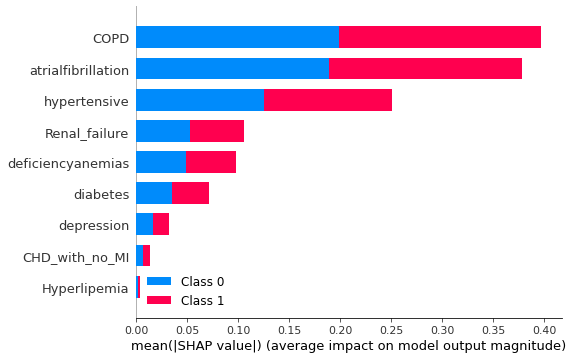

In [80]:
#SHAP feature importance 
shap.summary_plot(shap_values,X_test)

#### LIME

In [81]:
from lime import lime_tabular
explainer = lime_tabular.LimeTabularExplainer(
    training_data=np.array(X_train),
    feature_names=X_train.columns,
    class_names=['bad', 'good'],
    mode='classification'
)

exp = explainer.explain_instance(
    data_row=X_test.iloc[2], 
    predict_fn=best_forest.predict_proba
)

exp.show_in_notebook(show_table=True)


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


#### KNN

In [104]:
knn_pipeline = make_pipeline(KNeighborsClassifier())

#params for GridSearchCV
param_grid_knn = [{
    'kneighborsclassifier__n_neighbors': [2, 3, 4, 5, 6, 7, 8, 9, 10, 15],
    'kneighborsclassifier__p': [1, 2],
    'kneighborsclassifier__algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'kneighborsclassifier__weights': ['uniform', 'distance']
}]


In [105]:
knn_cv = GridSearchCV(knn_pipeline, param_grid = param_grid_knn,
                  scoring='accuracy',
                  refit=True,
                  cv=10,
                  verbose=1,
                  n_jobs=2)

In [120]:
X_train = train_df[all_features].drop('outcome',axis=1).values
y_train = train_df[all_features]['outcome'].values

In [121]:
knn_cv.fit(X_train, y_train)
predictions_knn = knn_cv.predict(test_df.drop('outcome',axis=1).values)

Fitting 10 folds for each of 160 candidates, totalling 1600 fits


/Users/allenlau/opt/anaconda3/envs/models/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/allenlau/opt/anaconda3/envs/models/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and t

/Users/allenlau/opt/anaconda3/envs/models/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/allenlau/opt/anaconda3/envs/models/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and t

/Users/allenlau/opt/anaconda3/envs/models/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/allenlau/opt/anaconda3/envs/models/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and t

/Users/allenlau/opt/anaconda3/envs/models/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/allenlau/opt/anaconda3/envs/models/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and t

/Users/allenlau/opt/anaconda3/envs/models/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/allenlau/opt/anaconda3/envs/models/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and t

/Users/allenlau/opt/anaconda3/envs/models/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/allenlau/opt/anaconda3/envs/models/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and t

/Users/allenlau/opt/anaconda3/envs/models/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/allenlau/opt/anaconda3/envs/models/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and t

/Users/allenlau/opt/anaconda3/envs/models/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/allenlau/opt/anaconda3/envs/models/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and t

/Users/allenlau/opt/anaconda3/envs/models/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/allenlau/opt/anaconda3/envs/models/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and t

/Users/allenlau/opt/anaconda3/envs/models/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/allenlau/opt/anaconda3/envs/models/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and t

/Users/allenlau/opt/anaconda3/envs/models/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/allenlau/opt/anaconda3/envs/models/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and t

/Users/allenlau/opt/anaconda3/envs/models/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/allenlau/opt/anaconda3/envs/models/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and t

/Users/allenlau/opt/anaconda3/envs/models/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/allenlau/opt/anaconda3/envs/models/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and t

/Users/allenlau/opt/anaconda3/envs/models/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/allenlau/opt/anaconda3/envs/models/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and t

/Users/allenlau/opt/anaconda3/envs/models/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/allenlau/opt/anaconda3/envs/models/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and t

/Users/allenlau/opt/anaconda3/envs/models/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/allenlau/opt/anaconda3/envs/models/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and t

/Users/allenlau/opt/anaconda3/envs/models/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/allenlau/opt/anaconda3/envs/models/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and t

/Users/allenlau/opt/anaconda3/envs/models/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/allenlau/opt/anaconda3/envs/models/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and t

/Users/allenlau/opt/anaconda3/envs/models/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/allenlau/opt/anaconda3/envs/models/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and t

/Users/allenlau/opt/anaconda3/envs/models/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/allenlau/opt/anaconda3/envs/models/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and t

/Users/allenlau/opt/anaconda3/envs/models/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/allenlau/opt/anaconda3/envs/models/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and t

/Users/allenlau/opt/anaconda3/envs/models/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/allenlau/opt/anaconda3/envs/models/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and t

/Users/allenlau/opt/anaconda3/envs/models/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/allenlau/opt/anaconda3/envs/models/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and t

/Users/allenlau/opt/anaconda3/envs/models/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/allenlau/opt/anaconda3/envs/models/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and t

/Users/allenlau/opt/anaconda3/envs/models/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/allenlau/opt/anaconda3/envs/models/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and t

/Users/allenlau/opt/anaconda3/envs/models/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/allenlau/opt/anaconda3/envs/models/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and t

/Users/allenlau/opt/anaconda3/envs/models/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/allenlau/opt/anaconda3/envs/models/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and t

/Users/allenlau/opt/anaconda3/envs/models/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/allenlau/opt/anaconda3/envs/models/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and t

/Users/allenlau/opt/anaconda3/envs/models/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/allenlau/opt/anaconda3/envs/models/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and t

/Users/allenlau/opt/anaconda3/envs/models/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/allenlau/opt/anaconda3/envs/models/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and t

/Users/allenlau/opt/anaconda3/envs/models/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/allenlau/opt/anaconda3/envs/models/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and t

/Users/allenlau/opt/anaconda3/envs/models/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/allenlau/opt/anaconda3/envs/models/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and t

/Users/allenlau/opt/anaconda3/envs/models/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/allenlau/opt/anaconda3/envs/models/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and t

/Users/allenlau/opt/anaconda3/envs/models/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/allenlau/opt/anaconda3/envs/models/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and t

/Users/allenlau/opt/anaconda3/envs/models/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/allenlau/opt/anaconda3/envs/models/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and t

/Users/allenlau/opt/anaconda3/envs/models/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/allenlau/opt/anaconda3/envs/models/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and t

/Users/allenlau/opt/anaconda3/envs/models/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/allenlau/opt/anaconda3/envs/models/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and t

/Users/allenlau/opt/anaconda3/envs/models/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/allenlau/opt/anaconda3/envs/models/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and t

/Users/allenlau/opt/anaconda3/envs/models/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/allenlau/opt/anaconda3/envs/models/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and t

In [122]:
knn_cv.best_params_

{'kneighborsclassifier__algorithm': 'auto',
 'kneighborsclassifier__n_neighbors': 2,
 'kneighborsclassifier__p': 2,
 'kneighborsclassifier__weights': 'distance'}

In [124]:
knn_cv.best_score_

0.9519616753768082

In [125]:
best_grid_knn = knn_cv.best_estimator_
best_grid_knn

Pipeline(steps=[('kneighborsclassifier',
                 KNeighborsClassifier(n_neighbors=2, weights='distance'))])

In [126]:
# X = df.drop(['outcome'], axis=1)
# y = df['outcome']
# X_train, X_test, y_train, y_test = train_test_split(X, 
#                                                     y, test_size=0.30, 
#                                                     random_state=42)

In [127]:
# best_grid_knn.fit(X_train, y_train)
# knn_pred2 = best_grid_knn.predict(test_df)

In [128]:
print('Accuracy Score: ', accuracy_score(test_df['outcome'].values, predictions_knn))
print('Confusion Matrix: \n', confusion_matrix(test_df['outcome'].values, predictions_knn))
print('Classification Report:\n ', classification_report(test_df['outcome'].values, predictions_knn))

Accuracy Score:  0.8305084745762712
Confusion Matrix: 
 [[187  18]
 [ 22   9]]
Classification Report:
                precision    recall  f1-score   support

         0.0       0.89      0.91      0.90       205
         1.0       0.33      0.29      0.31        31

    accuracy                           0.83       236
   macro avg       0.61      0.60      0.61       236
weighted avg       0.82      0.83      0.83       236



<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

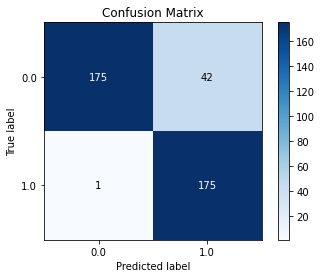

In [91]:
skplt.metrics.plot_confusion_matrix(y_test, knn_pred2, normalize=False, title = 'Confusion Matrix')

In [92]:
df['outcome'].value_counts()

0.0    707
1.0    600
Name: outcome, dtype: int64

In [95]:
import researchpy as rp
for i in range(len(cat_df.columns)):
    var, chitest, expected =rp.crosstab(cat_df.iloc[:,-1],cat_df.iloc[:,i], margins = False, test= "chi-square", cramer_correction= True, expected_freqs=True)
    print(var)
    print(chitest)
    print(expected)
    print("-----------------------------------------------------------")

             hypertensive     
hypertensive            0    1
outcome                       
0.0                   195  512
1.0                   208  392
                Chi-square test  results
0  Pearson Chi-square ( 1.0) =    7.6400
1                    p-value =    0.0057
2               Cramer's phi =    0.0765
             hypertensive            
hypertensive            0           1
outcome                              
0.0            217.996174  489.003826
1.0            185.003826  414.996174
-----------------------------------------------------------
                   atrialfibrillation     
atrialfibrillation                  0    1
outcome                                   
0.0                               397  310
1.0                               240  360
                Chi-square test  results
0  Pearson Chi-square ( 1.0) =   33.8942
1                    p-value =    0.0000
2               Cramer's phi =    0.1610
                   atrialfibrillation            
at